# BACKGROUND
### About Dataset
This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

### Content:
This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
- BOROUGH: A digit code for the borough the property is located in; in order these are 
1. Manhattan 
2. Bronx 
3. Brooklyn 
4. Queens 
5. Staten Island
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.

For further reference on individual fields see the Glossary of Terms. For the building classification codes see the Building Classifications Glossary.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

### Acknowledgements:
This dataset is a concatenated and slightly cleaned-up version of the New York City Department of Finance's Rolling Sales dataset.

#### Inspiration:
What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market, or build a model that predicts sale value in the future?

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats as stats
import seaborn as sns
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings('ignore')


# Data Gathering, Data Cleaning, and Preparation

### Membaca dataset

In [2]:
df_nyc = pd.read_csv('nyc-rolling-sales.csv', skipinitialspace=True)
df_nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


### Mengetahui missing values pada dataset

In [3]:
df_nyc.isna().sum().sort_values(ascending=False)

EASE-MENT                         84548
APARTMENT NUMBER                  65496
TAX CLASS AT PRESENT                738
BUILDING CLASS AT PRESENT           738
Unnamed: 0                            0
COMMERCIAL UNITS                      0
SALE PRICE                            0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
YEAR BUILT                            0
GROSS SQUARE FEET                     0
LAND SQUARE FEET                      0
TOTAL UNITS                           0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
BOROUGH                               0
ADDRESS                               0
LOT                                   0
BLOCK                                 0
BUILDING CLASS CATEGORY               0
NEIGHBORHOOD                          0
SALE DATE                             0
dtype: int64

### Mengetahui tipe data dari setiap atribut dataset

In [4]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

### Mengetahui kolom yang terdapat di dataframe

In [5]:
df_nyc.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

### Menghapus kolom yang tidak digunakan dalam analisis

In [6]:
df_nyc.drop(columns={'Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER', 'ZIP CODE'}, inplace=True)
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            83810 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       83810 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   RESIDENTIAL UNITS               84548 non-null  int64 
 9   COMMERCIAL UNITS                84548 non-null  int64 
 10  TOTAL UNITS                     84548 non-null  int64 
 11  LAND SQUARE FEET                84548 non-null  object
 12  GROSS SQUARE FEET               84548 non-null

### Mengatur format tipe data beberapa kolom pada dataframe 

In [8]:
# mengubah kolom tipe data pada kolom land square feet dan gross square feet menjadi numeric
df_nyc['LAND SQUARE FEET'] = pd.to_numeric(df_nyc['LAND SQUARE FEET'], errors='coerce')
df_nyc['GROSS SQUARE FEET'] = pd.to_numeric(df_nyc['GROSS SQUARE FEET'], errors='coerce')

# mengubah kolom tipe data pada kolom sale price menjadi numeric
df_nyc['SALE PRICE'] = pd.to_numeric(df_nyc['SALE PRICE'], errors='coerce')

# mengubah kolom tipe data pada kolom sale date menjadi datetime
df_nyc['SALE DATE']= pd.to_datetime(df_nyc['SALE DATE'], errors='coerce')

# mengatur tipe data beberapa kolom menjadi categorical
cat_col = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'BUILDING CLASS AT TIME OF SALE']

for i in cat_col:
    df_nyc[i] = df_nyc[i].astype('category')

In [9]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   ADDRESS                         84548 non-null  category      
 8   RESIDENTIAL UNITS               84548 non-null  int64         
 9   COMMERCIAL UNITS                84548 non-null  int64         
 10  TOTAL UNITS                     84548 non-null  int64         
 11  LA

### Memeriksa jumlah baris duplikat

In [10]:
sum(df_nyc.duplicated())

767

### Menghapus baris duplikat

In [11]:
df_nyc = df_nyc.drop_duplicates(df_nyc.columns, keep='last')
sum(df_nyc.duplicated())

0

### Mengetahui dimensi dataset

In [12]:
df_nyc.shape

(83781, 18)

### Memeriksa nilai null pada dataset

In [13]:
df_nyc.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

### Mengatur value null pada dataset

In [14]:
df_nyc = df_nyc[df_nyc['TAX CLASS AT PRESENT'].notnull()]
df_nyc = df_nyc[df_nyc['BUILDING CLASS AT PRESENT'].notnull()]
df_nyc = df_nyc[df_nyc['SALE PRICE'].notnull()]
df_nyc = df_nyc[df_nyc['LAND SQUARE FEET'].notnull()]
df_nyc = df_nyc[df_nyc['GROSS SQUARE FEET'].notnull()]

In [15]:
df_nyc.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [16]:
df_nyc['SALE PRICE'].isna().sum()

0

In [17]:
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [18]:
df_nyc.reset_index(inplace=True)
df_nyc.drop(columns=['index'], axis=1, inplace=True)

<AxesSubplot:>

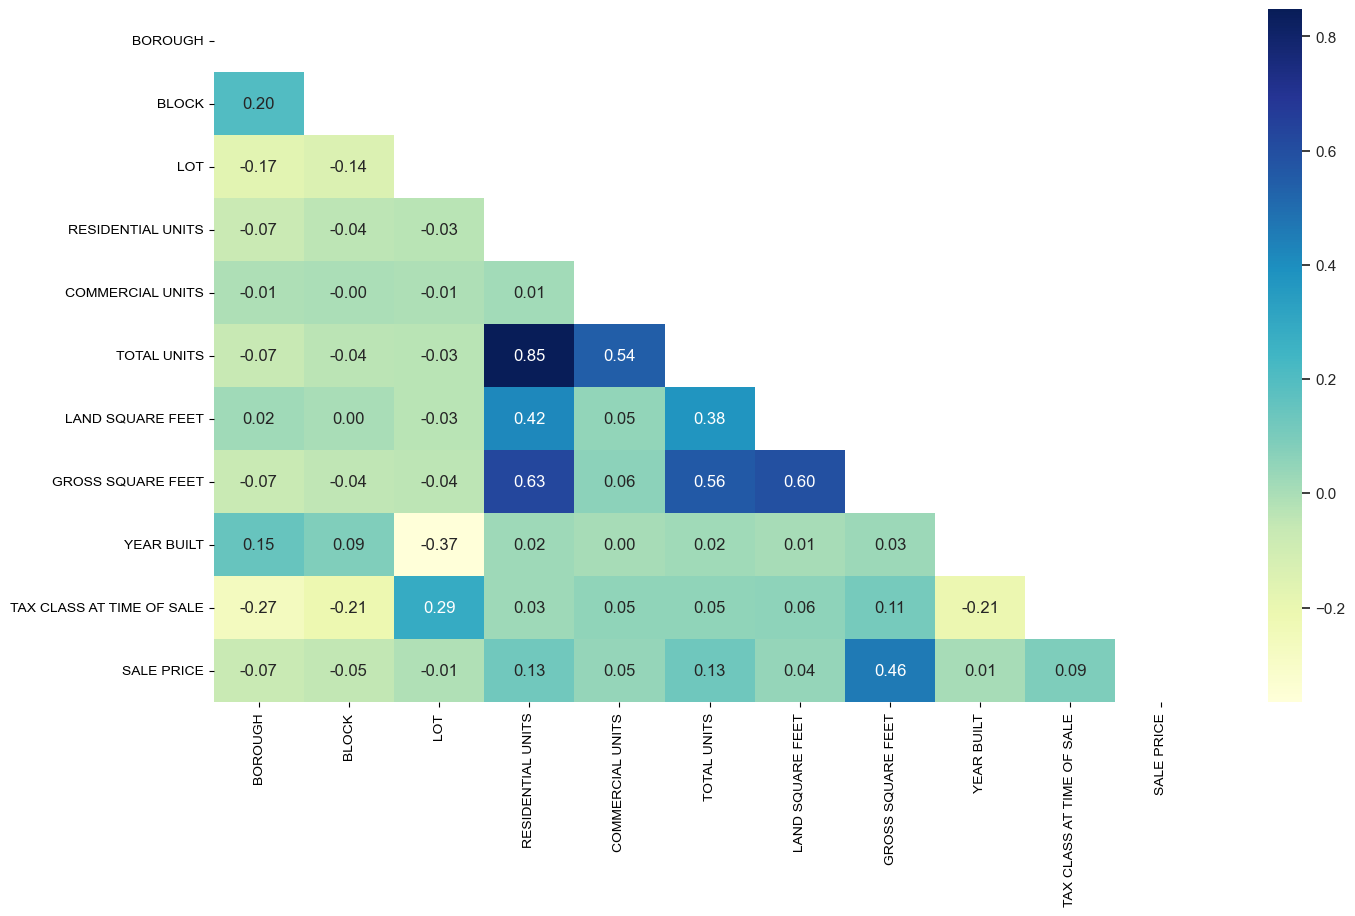

In [19]:
plt.subplots(figsize=(16, 9))
sns.set(style='white')
mask = np.triu(np.ones_like(df_nyc.corr()))
sns.heatmap(df_nyc.corr(method='pearson'), cmap='YlGnBu', annot=True, fmt='.2f', mask=mask)
# sns.heatmap(df_nyc.corr(), cmap='YlGnBu', annot=True, fmt='.2f', mask=mask)

## STATISTICS

In [20]:
df_nyc1= df_nyc[(df_nyc['SALE PRICE'] >1000000) & (df_nyc['SALE PRICE'] < 5000000)]
df_nyc1

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
7,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,624 EAST 9TH STREET,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15
9,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,183 AVENUE B,5,1,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03
10,1,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,115 AVENUE C,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47402,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,1988,25,A3,105 JOSEPH AVENUE,1,0,1,6400.0,4512.0,1985,1,A3,1178500.0,2017-01-17
47448,5,WILLOWBROOK,22 STORE BUILDINGS,4,2015,28,K1,2075 RICHMOND AVENUE,0,1,1,15640.0,6000.0,1983,4,K1,2900000.0,2017-01-27
47473,5,WOODROW,01 ONE FAMILY DWELLINGS,1,7091,55,A1,15 GLADWIN STREET,1,0,1,13253.0,4000.0,1997,1,A1,1060000.0,2016-12-02
47508,5,WOODROW,02 TWO FAMILY DWELLINGS,1,6914,17,B2,1056 EDGEGROVE AVENUE,2,0,2,10000.0,3688.0,1982,1,B2,1100000.0,2017-06-09


## GAMMA DISTRIBUTION

<AxesSubplot:xlabel='Gamma Distribution', ylabel='Density'>

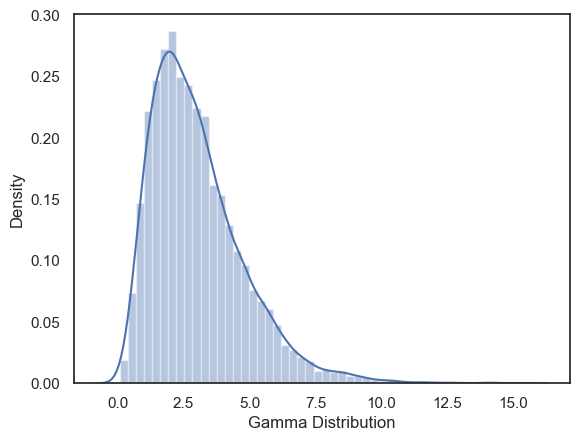

In [21]:
from scipy.stats import gamma
df_nyc1['Gamma Distribution'] = stats.gamma(scale=1, loc=0, a=3).rvs(size=len(df_nyc1))
sns.distplot(df_nyc1['Gamma Distribution'])

## NORMAL DISTRIBUTION

<AxesSubplot:xlabel='Normal Distribution', ylabel='Density'>

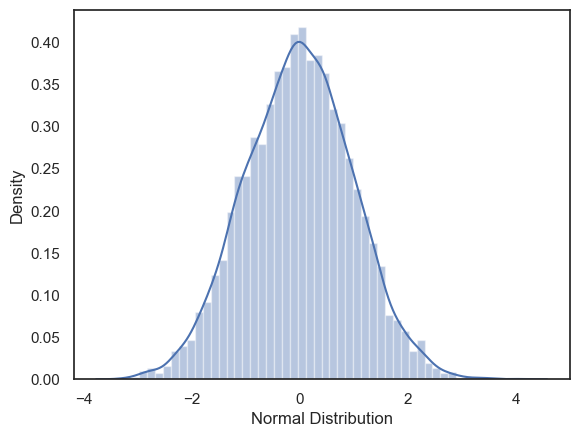

In [22]:
from scipy.stats import norm
df_nyc1['Normal Distribution'] = stats.norm(scale=1, loc=0).rvs(size=len(df_nyc1))
sns.distplot(df_nyc1['Normal Distribution'])

## EXPONENTIAL DISTRIBUTION

<AxesSubplot:xlabel='Exponential Distribution', ylabel='Density'>

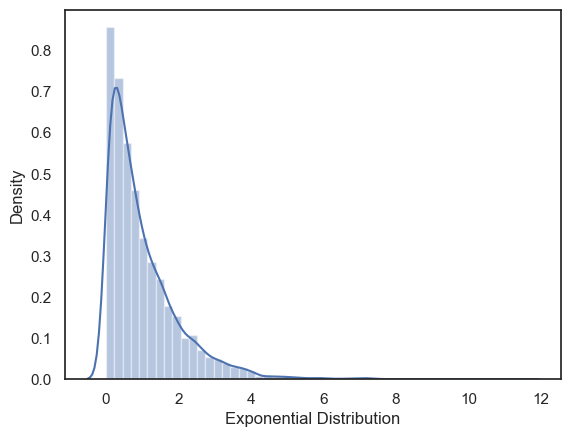

In [23]:
from scipy.stats import expon
df_nyc1['Exponential Distribution'] = stats.expon(scale=1, loc=0).rvs(size=len(df_nyc1))
sns.distplot(df_nyc1['Exponential Distribution'])

In [24]:
df = df_nyc[['BOROUGH', 'TAX CLASS AT TIME OF SALE', 'SALE PRICE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'LAND SQUARE FEET']]
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47542 entries, 0 to 47541
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         47542 non-null  int64         
 1   NEIGHBORHOOD                    47542 non-null  category      
 2   BUILDING CLASS CATEGORY         47542 non-null  category      
 3   TAX CLASS AT PRESENT            47542 non-null  category      
 4   BLOCK                           47542 non-null  int64         
 5   LOT                             47542 non-null  int64         
 6   BUILDING CLASS AT PRESENT       47542 non-null  category      
 7   ADDRESS                         47542 non-null  category      
 8   RESIDENTIAL UNITS               47542 non-null  int64         
 9   COMMERCIAL UNITS                47542 non-null  int64         
 10  TOTAL UNITS                     47542 non-null  int64         
 11  LA

## Deskriptif Statistik Dataset

In [25]:
df_nyc[['SALE PRICE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'LAND SQUARE FEET']].describe()

,SALE PRICE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET
count,4.754200e+04,47542.000000,47542.000000,47542.000000,4.754200e+04,4.754200e+04
mean,1.160738e+06,2.553763,0.239241,2.812103,3.552129e+03,3.293137e+03
std,1.349235e+07,17.232339,10.885811,20.502323,2.931205e+04,3.065978e+04
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.000000e+05,1.000000,0.000000,1.000000,8.762500e+02,1.462250e+03
50%,4.830000e+05,1.000000,0.000000,1.000000,1.628000e+03,2.150000e+03
75%,8.300000e+05,2.000000,0.000000,2.000000,2.520000e+03,3.075000e+03
max,2.210000e+09,1844.000000,2261.000000,2261.000000,3.750565e+06,4.228300e+06


## Handling Outliers

In [26]:
def diagnostic_plots(df,variable):
    plt.figure(figsize=(16,4))
    
    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable],bins=30)
    plt.title('Histogram')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

### Sale Price

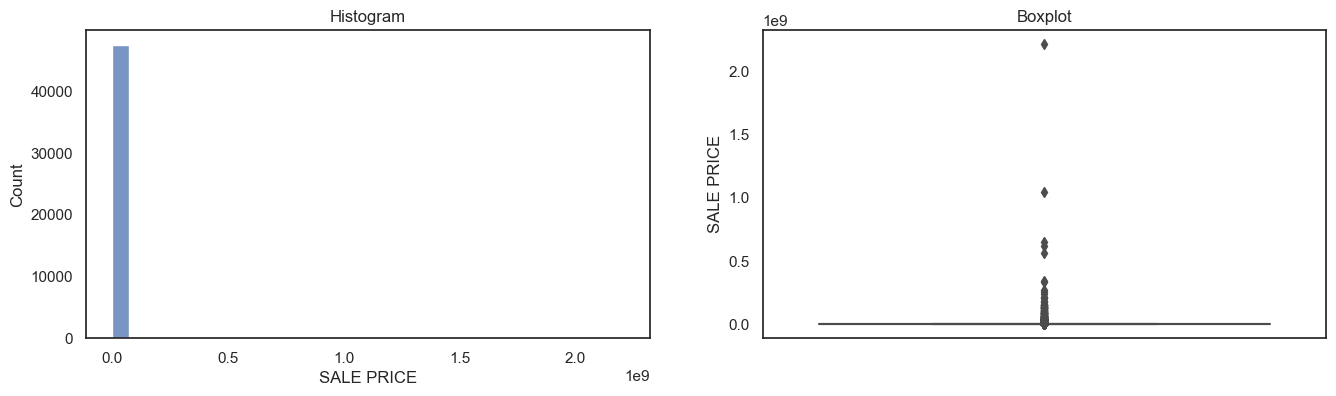


 Skewness of SALE PRICE : 109.96932245318922


In [27]:
diagnostic_plots(df, 'SALE PRICE')
print('\n Skewness of SALE PRICE :',df['SALE PRICE'].skew())

Skewness untuk atribut Sale price : positively skewness

### Residential Units

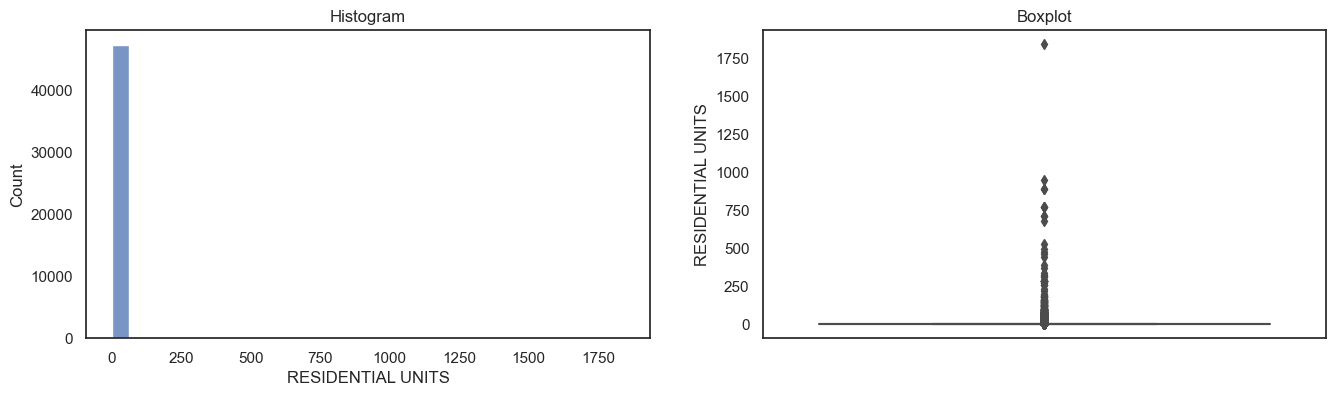


 Skewness of RESIDENTIAL UNITS : 50.060049915372495


In [28]:
diagnostic_plots(df, 'RESIDENTIAL UNITS')
print('\n Skewness of RESIDENTIAL UNITS :', df['RESIDENTIAL UNITS'].skew())

Skewness untuk atribut Residential units : positively skewness

### Land Square Feet

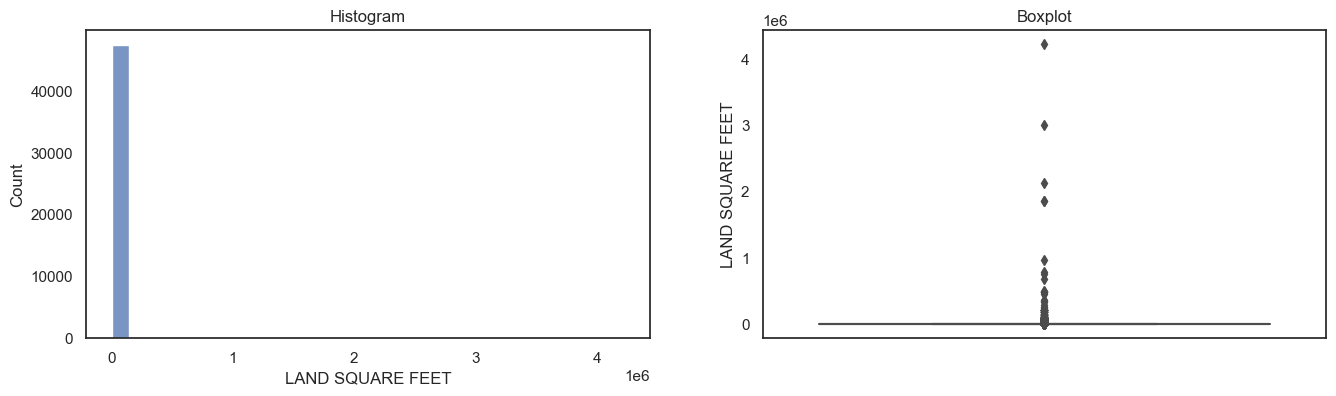


 Skewness of LAND SQUARE FEET : 93.65617470611005


In [29]:
diagnostic_plots(df, 'LAND SQUARE FEET')
print('\n Skewness of LAND SQUARE FEET :', df['LAND SQUARE FEET'].skew())

Skewness untuk atribut Land Square Feet : positively skewness

### Gross Square Feet

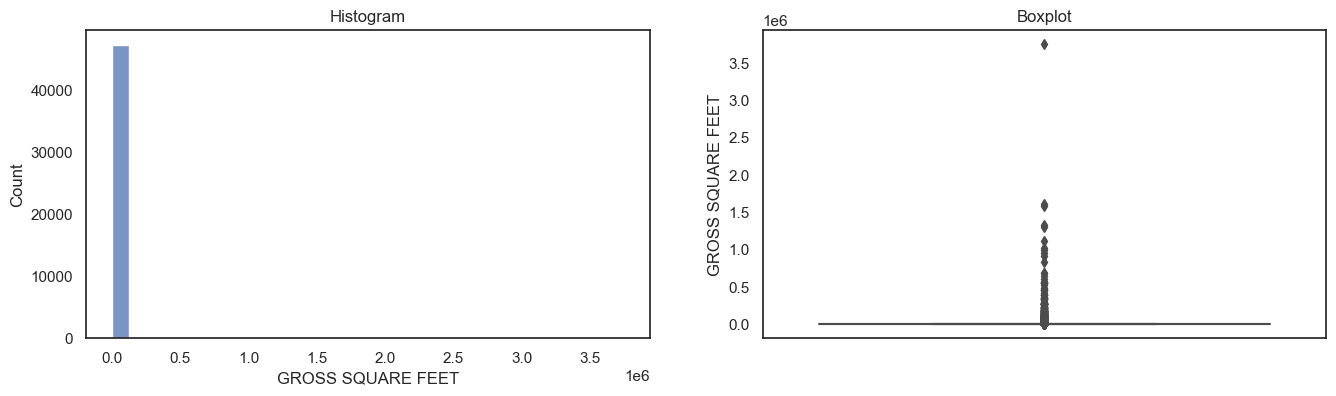


 Skewness of GROSS SQUARE FEET : 62.8852693425227


In [30]:
diagnostic_plots(df, 'GROSS SQUARE FEET')
print('\n Skewness of GROSS SQUARE FEET :', df['GROSS SQUARE FEET'].skew())

Skewness untuk atribut Gross Square Feet : positively skewness

### SALE PRICE

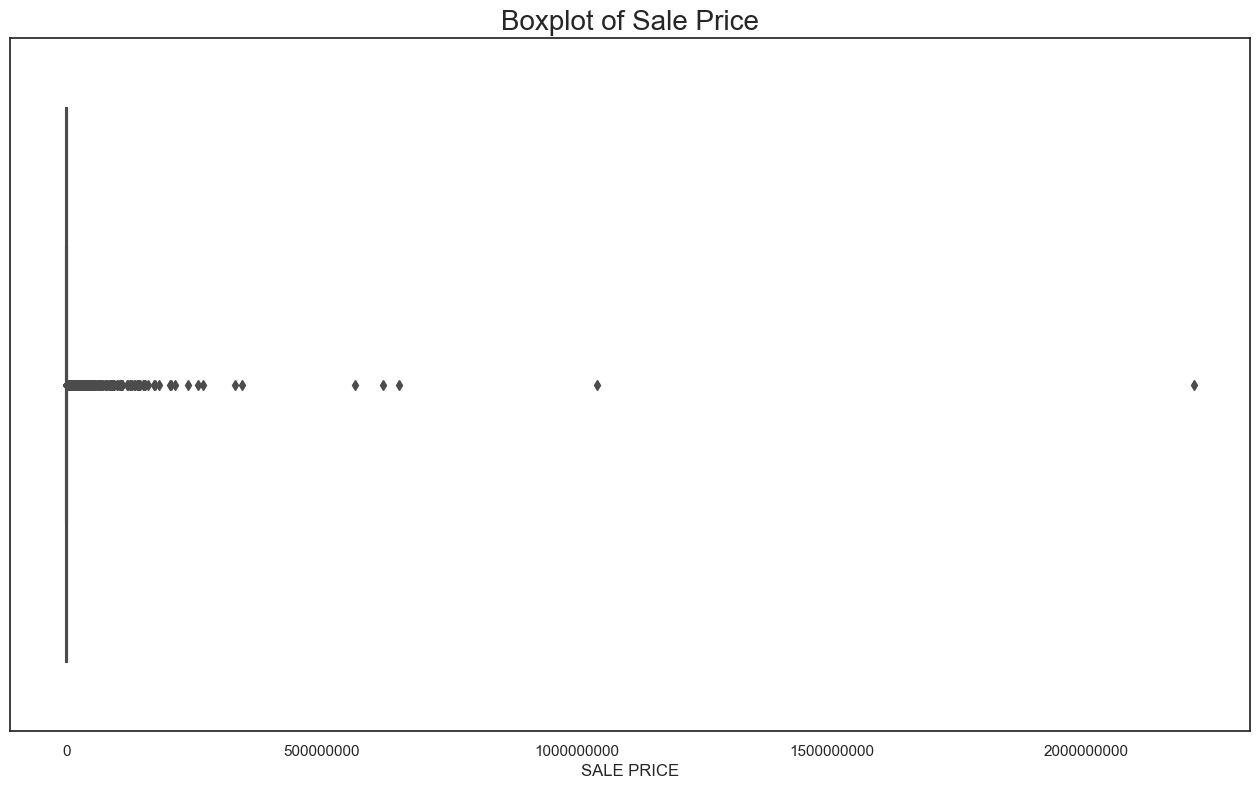

In [31]:
plt.figure(figsize=(16,9))
sns.boxplot(x='SALE PRICE', data=df[['SALE PRICE']])
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot of Sale Price", size=20)
plt.show()

In [32]:
df= df[(df['SALE PRICE'] >1000000) & (df['SALE PRICE'] < 2500000)]
df

,BOROUGH,TAX CLASS AT TIME OF SALE,SALE PRICE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET
20,1,2,1583840.0,9,0,9,6330.0,1566.0
29,1,2,2341975.0,30,2,32,78882.0,10053.0
102,1,4,1161500.0,0,12,12,55473.0,4937.0
127,1,4,1159531.0,0,35,35,217991.0,11553.0
170,1,1,1375000.0,1,0,1,1152.0,384.0
...,...,...,...,...,...,...,...,...
47326,5,2,1800000.0,2,2,4,3320.0,3354.0
47402,5,1,1178500.0,1,0,1,4512.0,6400.0
47473,5,1,1060000.0,1,0,1,4000.0,13253.0
47508,5,1,1100000.0,2,0,2,3688.0,10000.0


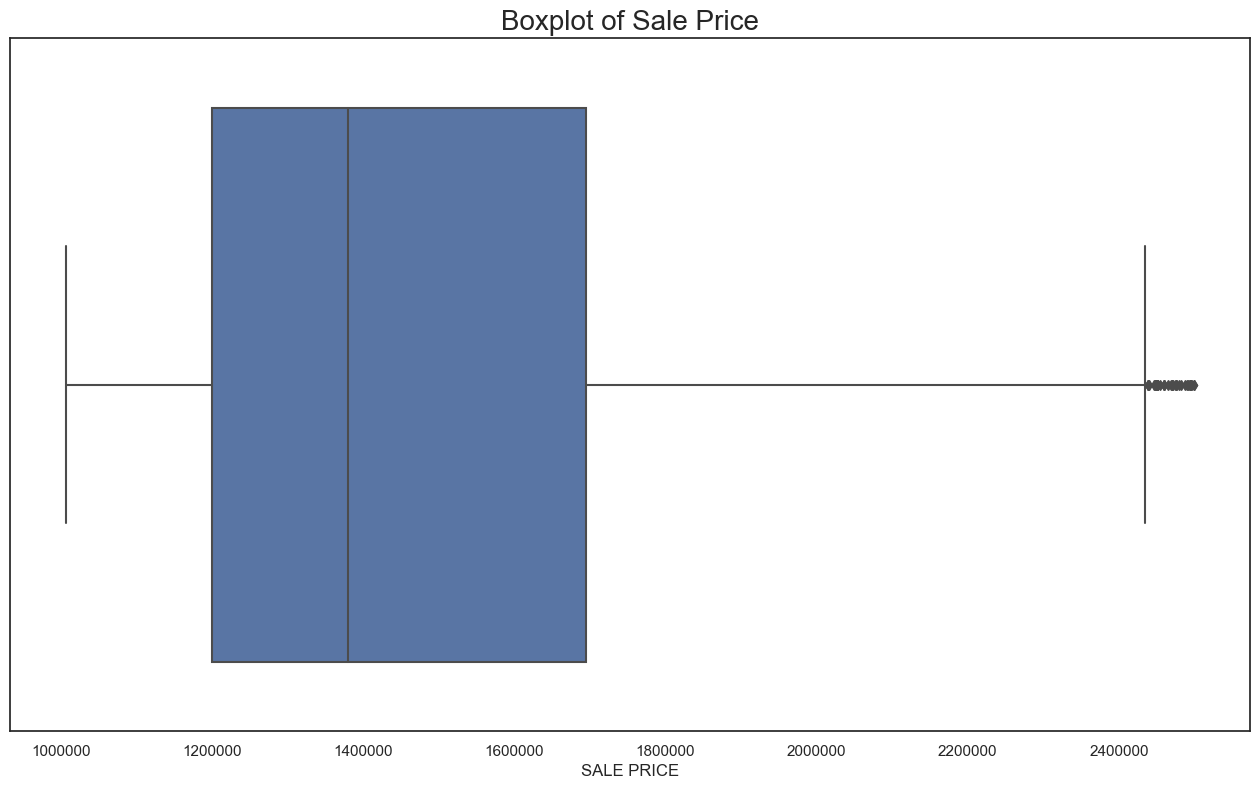

In [33]:
plt.figure(figsize=(16,9))
sns.boxplot(x='SALE PRICE', data=df[['SALE PRICE']])
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot of Sale Price", size=20)
plt.show()

### LAND SQUARE FEET

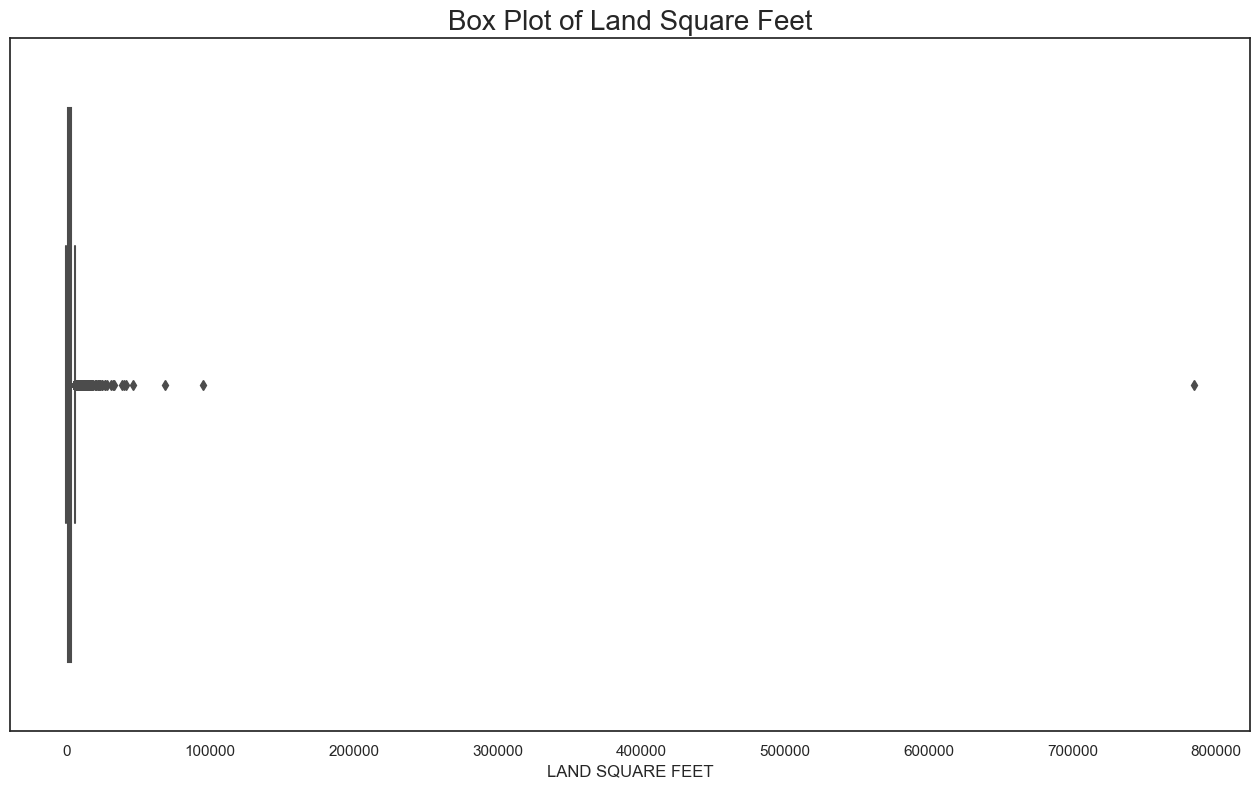

In [34]:
plt.figure(figsize=(16,9))
sns.boxplot(x='LAND SQUARE FEET', data=(df[['LAND SQUARE FEET']]))
plt.ticklabel_format(style='plain', axis='x')
plt.title("Box Plot of Land Square Feet", size=20)
plt.show()

Untuk menghilangkan outliers maka akan mengambil data LAND SQUARE FEET dengan rentang antara kurang dari 10.000

In [35]:
df = df[(df['LAND SQUARE FEET']<5000)]
df

,BOROUGH,TAX CLASS AT TIME OF SALE,SALE PRICE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET
20,1,2,1583840.0,9,0,9,6330.0,1566.0
102,1,4,1161500.0,0,12,12,55473.0,4937.0
170,1,1,1375000.0,1,0,1,1152.0,384.0
209,1,1,2300000.0,1,0,1,3036.0,1549.0
210,1,1,1510000.0,1,0,1,3200.0,1665.0
...,...,...,...,...,...,...,...,...
44686,5,1,1300000.0,1,0,1,1675.0,2420.0
45495,5,1,1900000.0,2,0,2,1640.0,2500.0
46856,5,1,1090000.0,2,0,2,4230.0,3560.0
47093,5,1,1070000.0,2,1,3,2700.0,3300.0


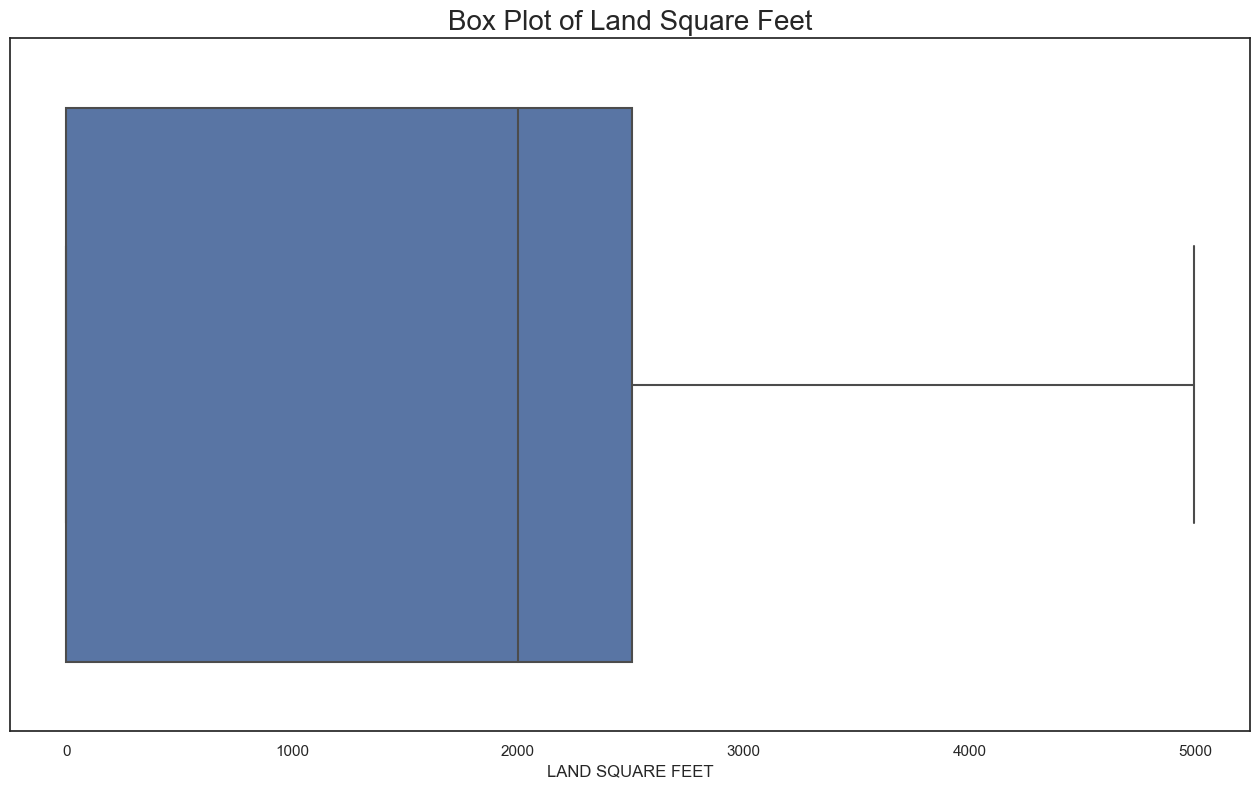

In [36]:
plt.figure(figsize=(16,9))
sns.boxplot(x='LAND SQUARE FEET', data=(df[['LAND SQUARE FEET']]))
plt.ticklabel_format(style='plain', axis='x')
plt.title("Box Plot of Land Square Feet", size=20)
plt.show()

### GROSS SQUARE FEET

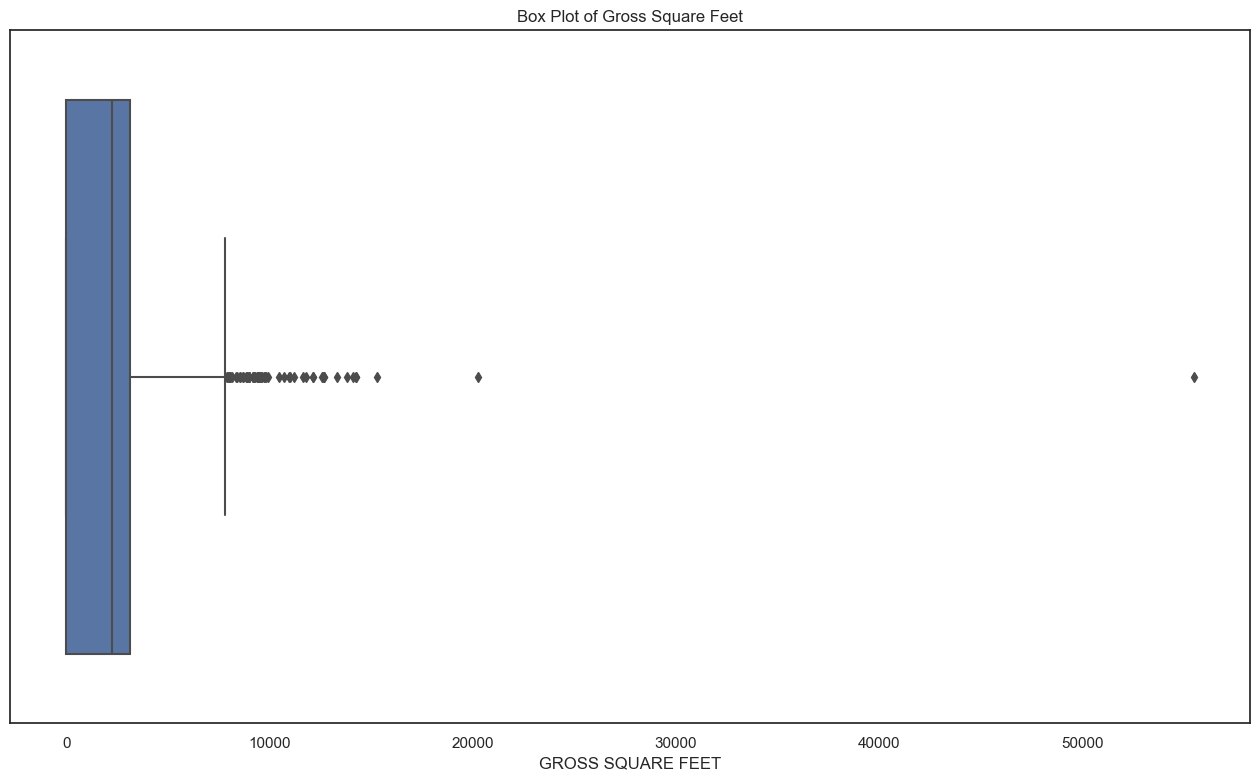

In [37]:
plt.figure(figsize=(16,9))
sns.boxplot(x='GROSS SQUARE FEET', data=df[['GROSS SQUARE FEET']])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Box Plot of Gross Square Feet')
plt.show()

Untuk menghilangkan outliers maka akan mengambil data GROSS SQUARE FEET pada rentang antara 1000 sampai 15000

In [38]:
df = df[(df['GROSS SQUARE FEET']>100) & (df['GROSS SQUARE FEET']<5000)]
df

,BOROUGH,TAX CLASS AT TIME OF SALE,SALE PRICE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET
170,1,1,1375000.0,1,0,1,1152.0,384.0
209,1,1,2300000.0,1,0,1,3036.0,1549.0
210,1,1,1510000.0,1,0,1,3200.0,1665.0
212,1,1,1595790.0,1,0,1,3536.0,1699.0
213,1,1,2200000.0,1,0,1,3951.0,1488.0
...,...,...,...,...,...,...,...,...
44686,5,1,1300000.0,1,0,1,1675.0,2420.0
45495,5,1,1900000.0,2,0,2,1640.0,2500.0
46856,5,1,1090000.0,2,0,2,4230.0,3560.0
47093,5,1,1070000.0,2,1,3,2700.0,3300.0


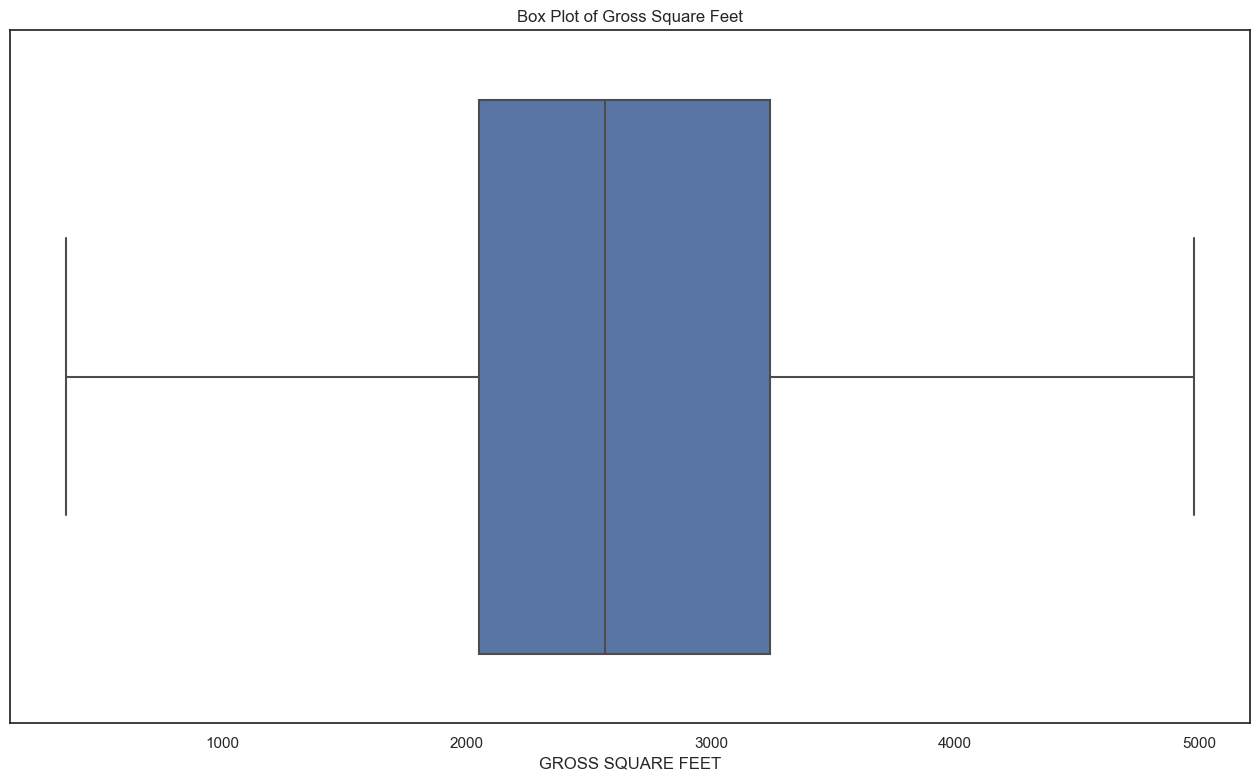

In [39]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df[['GROSS SQUARE FEET']], x='GROSS SQUARE FEET')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Box Plot of Gross Square Feet')
plt.show()

### RESIDENTIAL UNITS

In [40]:
df = df[(df['RESIDENTIAL UNITS']) != 0]
df

,BOROUGH,TAX CLASS AT TIME OF SALE,SALE PRICE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET
170,1,1,1375000.0,1,0,1,1152.0,384.0
209,1,1,2300000.0,1,0,1,3036.0,1549.0
210,1,1,1510000.0,1,0,1,3200.0,1665.0
212,1,1,1595790.0,1,0,1,3536.0,1699.0
213,1,1,2200000.0,1,0,1,3951.0,1488.0
...,...,...,...,...,...,...,...,...
44686,5,1,1300000.0,1,0,1,1675.0,2420.0
45495,5,1,1900000.0,2,0,2,1640.0,2500.0
46856,5,1,1090000.0,2,0,2,4230.0,3560.0
47093,5,1,1070000.0,2,1,3,2700.0,3300.0


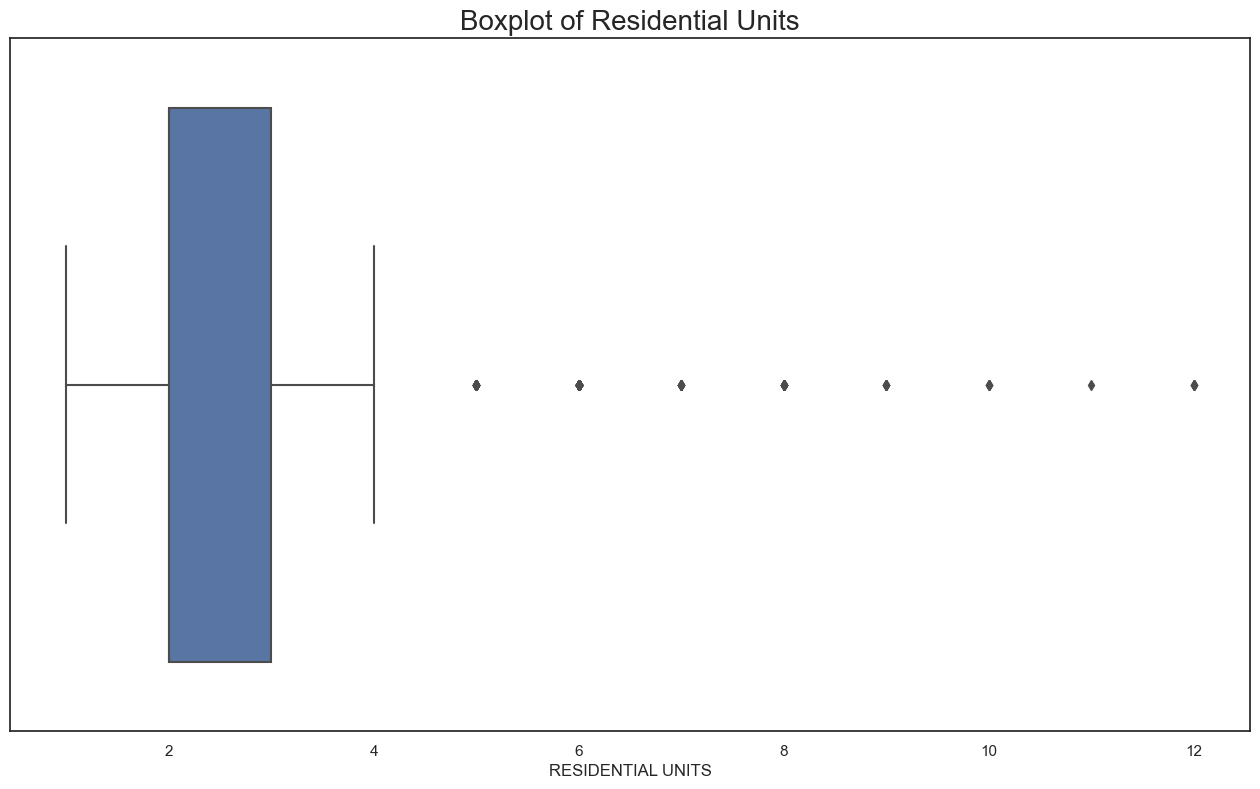

In [41]:
plt.figure(figsize=(16,9))
sns.boxplot(x='RESIDENTIAL UNITS', data=df[['RESIDENTIAL UNITS']])
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot of Residential Units", size=20)
plt.show()

Untuk menghilangkan outliers maka akan mengambil data RESIDENTIAL UNITS pada rentang antara kurang dari 25

In [42]:
df_nyc = df_nyc[df_nyc['RESIDENTIAL UNITS'] < 5]
df_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
7,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,624 EAST 9TH STREET,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15
8,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,393,4,S4,165 AVENUE B,4,1,5,2201.0,5608.0,1900,2,S4,7215000.0,2017-01-30
10,1,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,115 AVENUE C,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28
11,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,771,52,A9,224 WEST 22ND STREET,1,0,1,1975.0,3855.0,1901,1,A9,7425000.0,2016-12-30
12,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,1,0,1,1588.0,5653.0,1900,1,A4,10.0,2017-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47537,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
47538,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
47539,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
47540,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


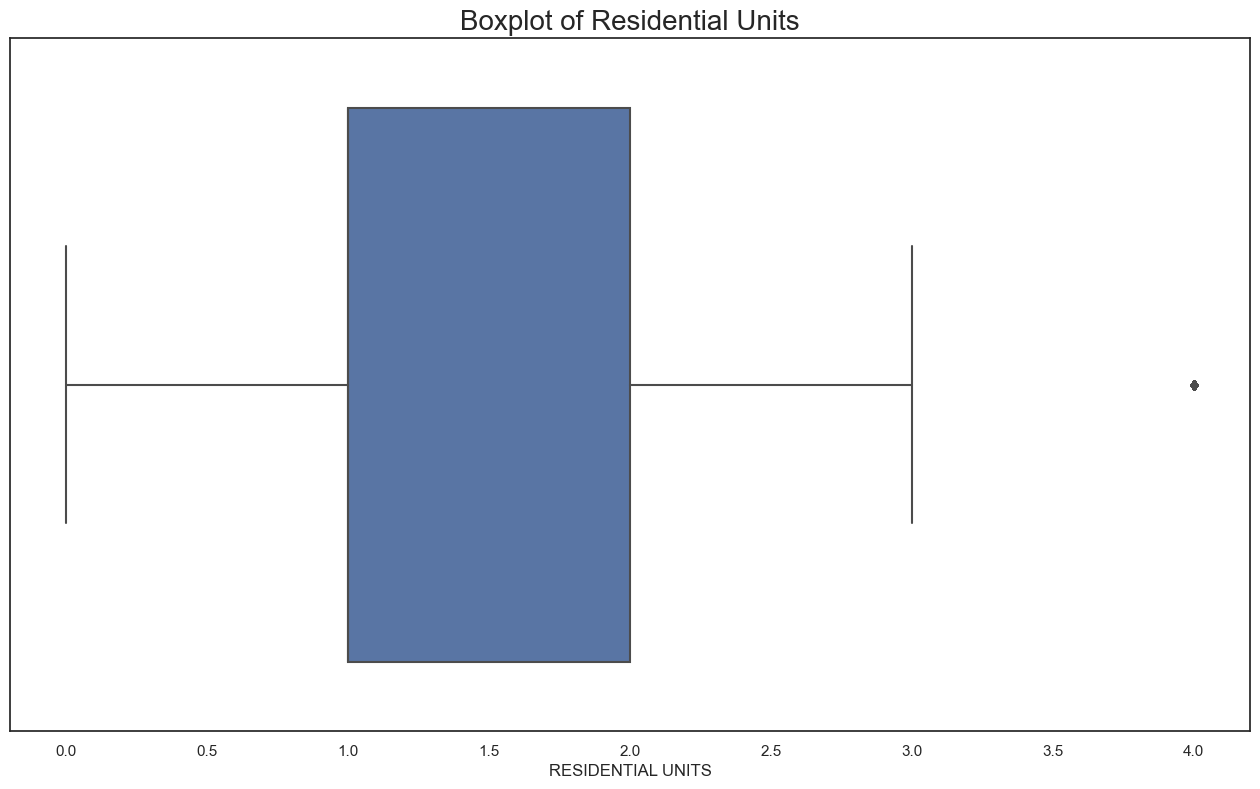

In [43]:
plt.figure(figsize=(16,9))
sns.boxplot(x='RESIDENTIAL UNITS', data=df_nyc[['RESIDENTIAL UNITS']])
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot of Residential Units", size=20)
plt.show()

### COMMERCIAL UNITS

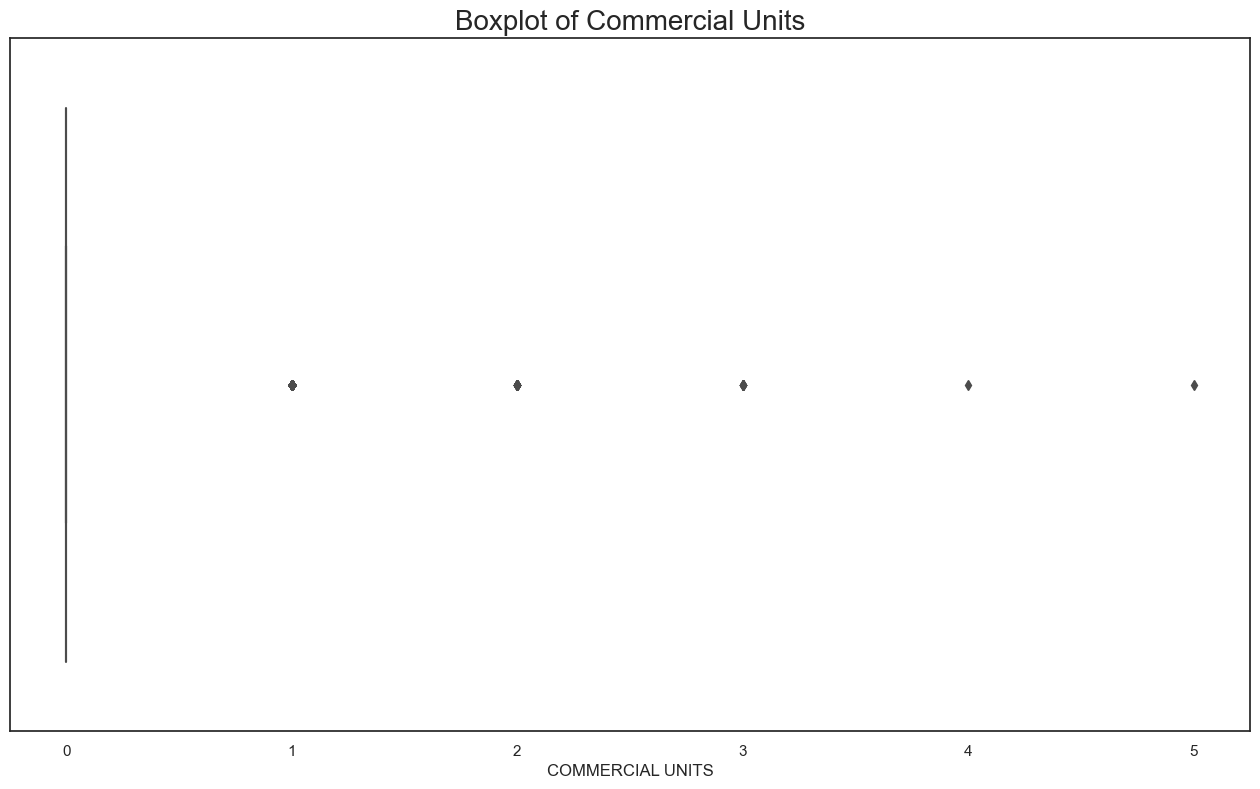

In [44]:
plt.figure(figsize=(16,9))
sns.boxplot(x='COMMERCIAL UNITS', data=df[['COMMERCIAL UNITS']])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Commercial Units', size=20)
plt.show()

Untuk mengiilangkan outliers maka akan mengambil data COMMERCIAL UNITS dengan rentang antara 0 sampai 10

In [45]:
df_nyc = df_nyc[(df_nyc['COMMERCIAL UNITS']>0) & (df_nyc['COMMERCIAL UNITS']<10)]
df_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
7,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,624 EAST 9TH STREET,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15
8,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,393,4,S4,165 AVENUE B,4,1,5,2201.0,5608.0,1900,2,S4,7215000.0,2017-01-30
10,1,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,115 AVENUE C,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28
13,1,CHELSEA,02 TWO FAMILY DWELLINGS,1,769,49,S2,218 WEST 20TH STREET,2,1,3,2150.0,4978.0,1920,1,S2,7750000.0,2017-04-17
31,1,CHELSEA,14 RENTALS - 4-10 UNIT,2A,716,1,S4,130 TENTH AVENUE,4,1,5,1875.0,5225.0,1910,2,S4,10581818.0,2016-11-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47330,5,WESTERLEIGH,22 STORE BUILDINGS,4,467,6,K2,286 WATCHOGUE ROAD,0,2,2,3000.0,2700.0,1985,4,K2,10.0,2017-03-03
47404,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,2030,54,S1,1847 RICHMOND AVENUE,1,1,2,9650.0,1704.0,1915,1,S1,925000.0,2017-06-01
47448,5,WILLOWBROOK,22 STORE BUILDINGS,4,2015,28,K1,2075 RICHMOND AVENUE,0,1,1,15640.0,6000.0,1983,4,K1,2900000.0,2017-01-27
47540,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


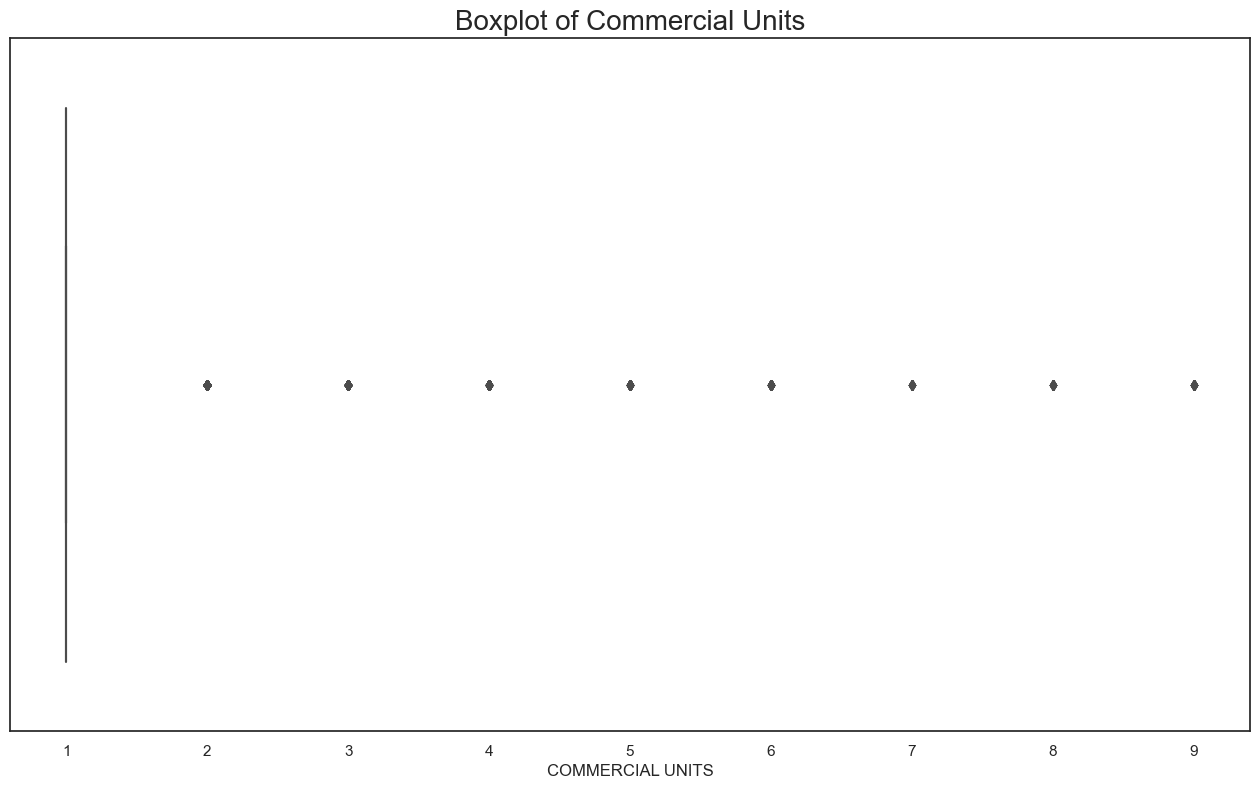

In [46]:
plt.figure(figsize=(16,9))
sns.boxplot(x='COMMERCIAL UNITS', data=df_nyc[['COMMERCIAL UNITS']])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Commercial Units', size=20)
plt.show()

### TOTAL UNITS

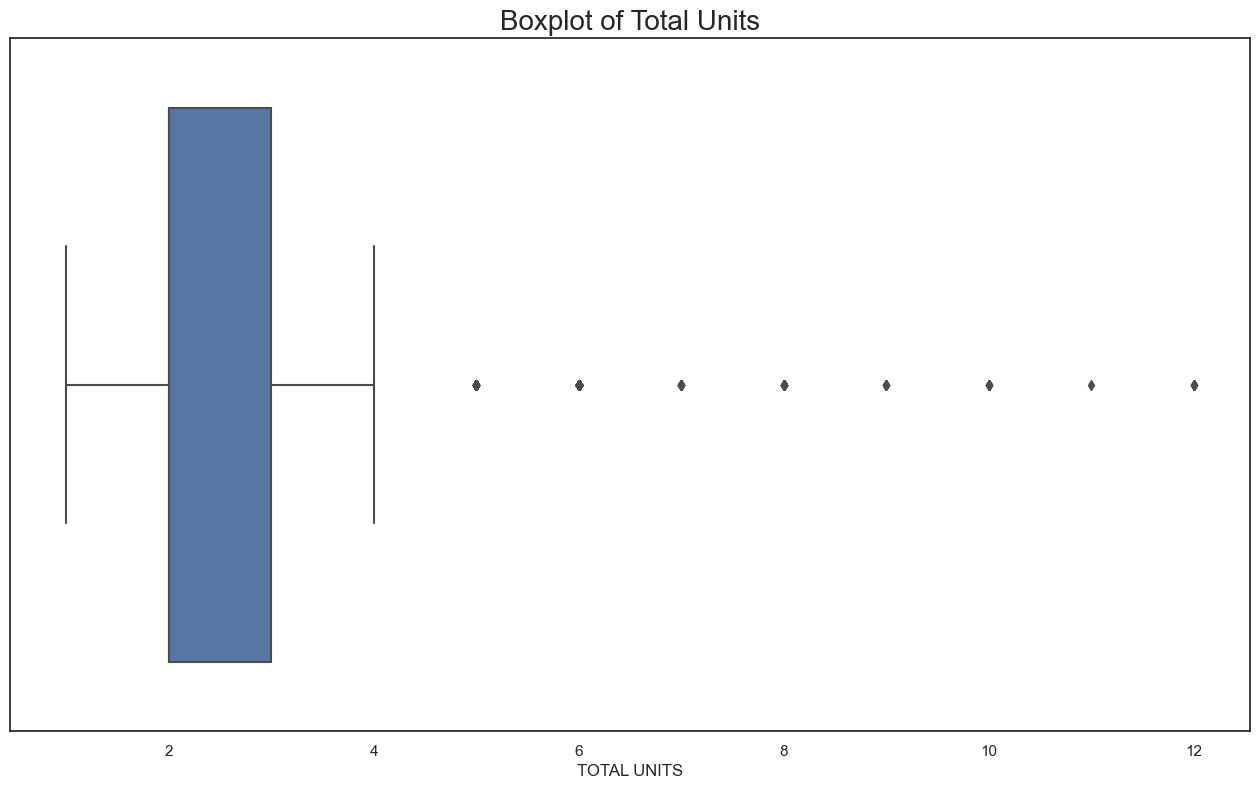

In [47]:
plt.figure(figsize=(16,9))
sns.boxplot(x='TOTAL UNITS', data=df[['TOTAL UNITS']])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Total Units', size=20)
plt.show()

Hanya mengambil data TOTAL UNITS yang hasilnya sesuai dengan penjumlahan antara RESIDENTIAL UNITS dan COMMERCIAL UNITS

In [48]:
df = df[(df['TOTAL UNITS'] == (df['RESIDENTIAL UNITS'] + df['COMMERCIAL UNITS'])) & (df['TOTAL UNITS']<5)]
df

,BOROUGH,TAX CLASS AT TIME OF SALE,SALE PRICE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET
170,1,1,1375000.0,1,0,1,1152.0,384.0
209,1,1,2300000.0,1,0,1,3036.0,1549.0
210,1,1,1510000.0,1,0,1,3200.0,1665.0
212,1,1,1595790.0,1,0,1,3536.0,1699.0
213,1,1,2200000.0,1,0,1,3951.0,1488.0
...,...,...,...,...,...,...,...,...
44686,5,1,1300000.0,1,0,1,1675.0,2420.0
45495,5,1,1900000.0,2,0,2,1640.0,2500.0
46856,5,1,1090000.0,2,0,2,4230.0,3560.0
47093,5,1,1070000.0,2,1,3,2700.0,3300.0


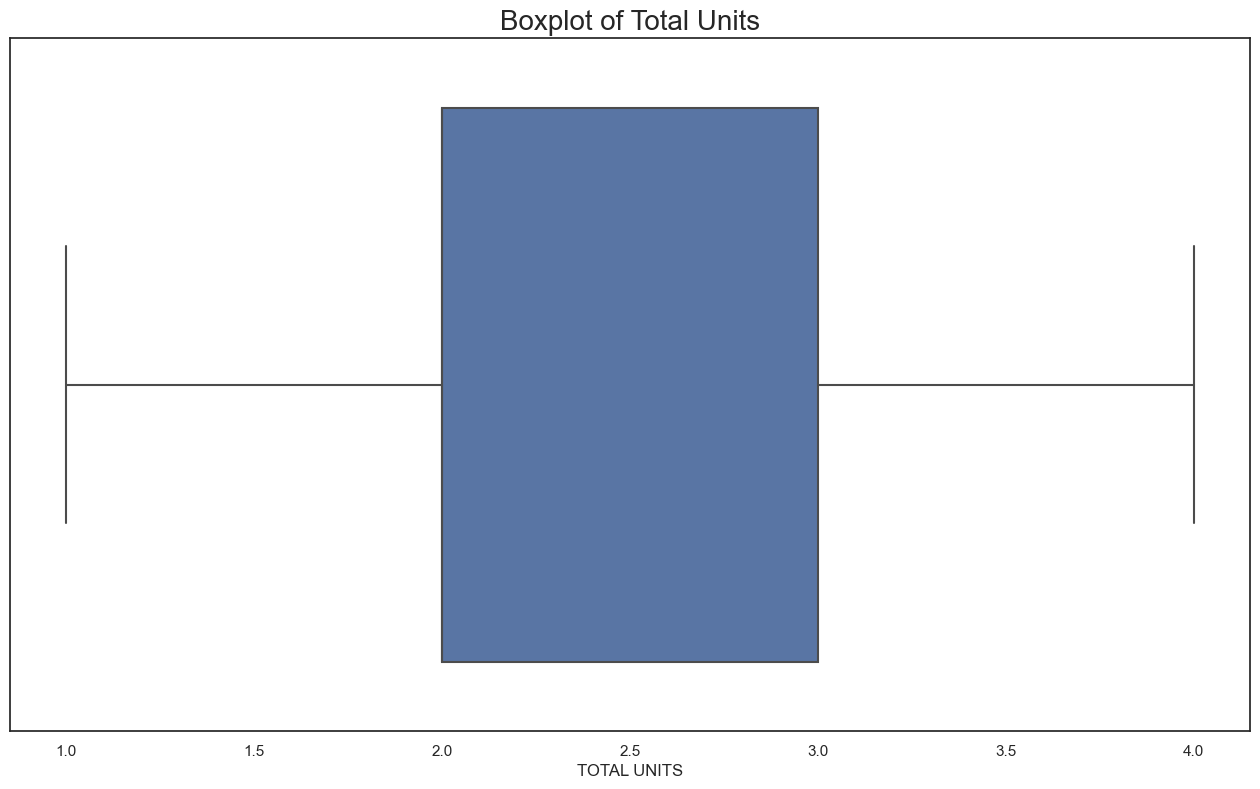

In [49]:
plt.figure(figsize=(16,9))
sns.boxplot(x='TOTAL UNITS', data=df[['TOTAL UNITS']])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Total Units', size=20)
plt.show()

#### Menampilkan informasi mengenai dataframe df

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942 entries, 170 to 47326
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BOROUGH                    2942 non-null   int64  
 1   TAX CLASS AT TIME OF SALE  2942 non-null   int64  
 2   SALE PRICE                 2942 non-null   float64
 3   RESIDENTIAL UNITS          2942 non-null   int64  
 4   COMMERCIAL UNITS           2942 non-null   int64  
 5   TOTAL UNITS                2942 non-null   int64  
 6   GROSS SQUARE FEET          2942 non-null   float64
 7   LAND SQUARE FEET           2942 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 206.9 KB


#### Membuat dataframe baru

In [51]:
df_nyc = df

#### Menampilkan informasi mengenai dataframe df_nyc

In [52]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942 entries, 170 to 47326
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BOROUGH                    2942 non-null   int64  
 1   TAX CLASS AT TIME OF SALE  2942 non-null   int64  
 2   SALE PRICE                 2942 non-null   float64
 3   RESIDENTIAL UNITS          2942 non-null   int64  
 4   COMMERCIAL UNITS           2942 non-null   int64  
 5   TOTAL UNITS                2942 non-null   int64  
 6   GROSS SQUARE FEET          2942 non-null   float64
 7   LAND SQUARE FEET           2942 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 206.9 KB


## MEASURE OF CETRAL TENDENCY

### Sale Price

In [53]:
mean_price = statistics.mean(df_nyc['SALE PRICE'])
print(f"Mean of Sale Price     : {mean_price}")
median_price = statistics.median(df_nyc['SALE PRICE'])
print(f"Median of Sale Price   : {median_price}")
mode_price = statistics.mode(df_nyc['SALE PRICE'])
print(f"Mode of Sale Price     : {mode_price}")

Mean of Sale Price     : 1432418.1434398368
Median of Sale Price   : 1325000.0
Mode of Sale Price     : 1100000.0


Hasil mean dan median untuk kolom 'SALE PRICE' menunjukkan bahwa distribusi data dari atribut ini belum normal, yang ditandai dengan nilai mean lebih besar dari median. Data cenderung condong ke kanan.

### Residential Units

In [54]:
mean_units = statistics.mean(df_nyc['RESIDENTIAL UNITS'])
print(f"Mean of Residential Units     : {mean_units}")
median_units = statistics.median(df_nyc['RESIDENTIAL UNITS'])
print(f"Median of Residential Units   : {median_units}")
mode_units= statistics.mode(df_nyc['RESIDENTIAL UNITS'])
print(f"Mode of Residential Units     : {mode_units}")

Mean of Residential Units     : 2.1832087015635624
Median of Residential Units   : 2.0
Mode of Residential Units     : 2


Hasil mean dan median untuk kolom 'RESIDENTIAL UNITS' menunjukkan bahwa distribusi data dari atribut ini belum normal, yang ditandai dengan nilai mean lebih besar dari median. Data cenderung condong ke kanan.

### Gross Square Feet

In [55]:
mean_gross = statistics.mean(df_nyc['GROSS SQUARE FEET'])
print(f"Mean of Gross Square Feet     : {mean_gross}")
median_gross = statistics.median(df_nyc['GROSS SQUARE FEET'])
print(f"Median of Gross Square Feet   : {median_gross}")
mode_gross= statistics.mode(df_nyc['GROSS SQUARE FEET'])
print(f"Mode of Gross Square Feet     : {mode_gross}")

Mean of Gross Square Feet     : 2557.1910265125766
Median of Gross Square Feet   : 2500.0
Mode of Gross Square Feet     : 2400.0


Hasil mean dan median untuk kolom 'GROSS SQUARE UNIT' menunjukkan bahwa distribusi data dari atribut ini belum normal, yang ditandai dengan nilai mean lebih besar dari median. Data cenderung condong ke kanan.

### Land Square Feet

In [56]:
mean_land = statistics.mean(df_nyc['LAND SQUARE FEET'])
print(f"Mean of Land Square Feet     : {mean_land}")
median_land = statistics.median(df_nyc['LAND SQUARE FEET'])
print(f"Median of RLand Square Feet   : {median_land}")
mode_land = statistics.mode(df_nyc['LAND SQUARE FEET'])
print(f"Mode of Land Square Feet     : {mode_land}")

Mean of Land Square Feet     : 2439.9034670292317
Median of RLand Square Feet   : 2174.0
Mode of Land Square Feet     : 2000.0


Hasil mean dan median untuk kolom 'LAND SQUARE UNIT' menunjukkan bahwa distribusi data dari atribut ini belum normal, yang ditandai dengan nilai mean lebih besar dari median. Data cenderung condong ke kanan.

### Melihat distribusi dari atribut SALE PRICE

Text(1700000, 2.5e-06, 'mean')

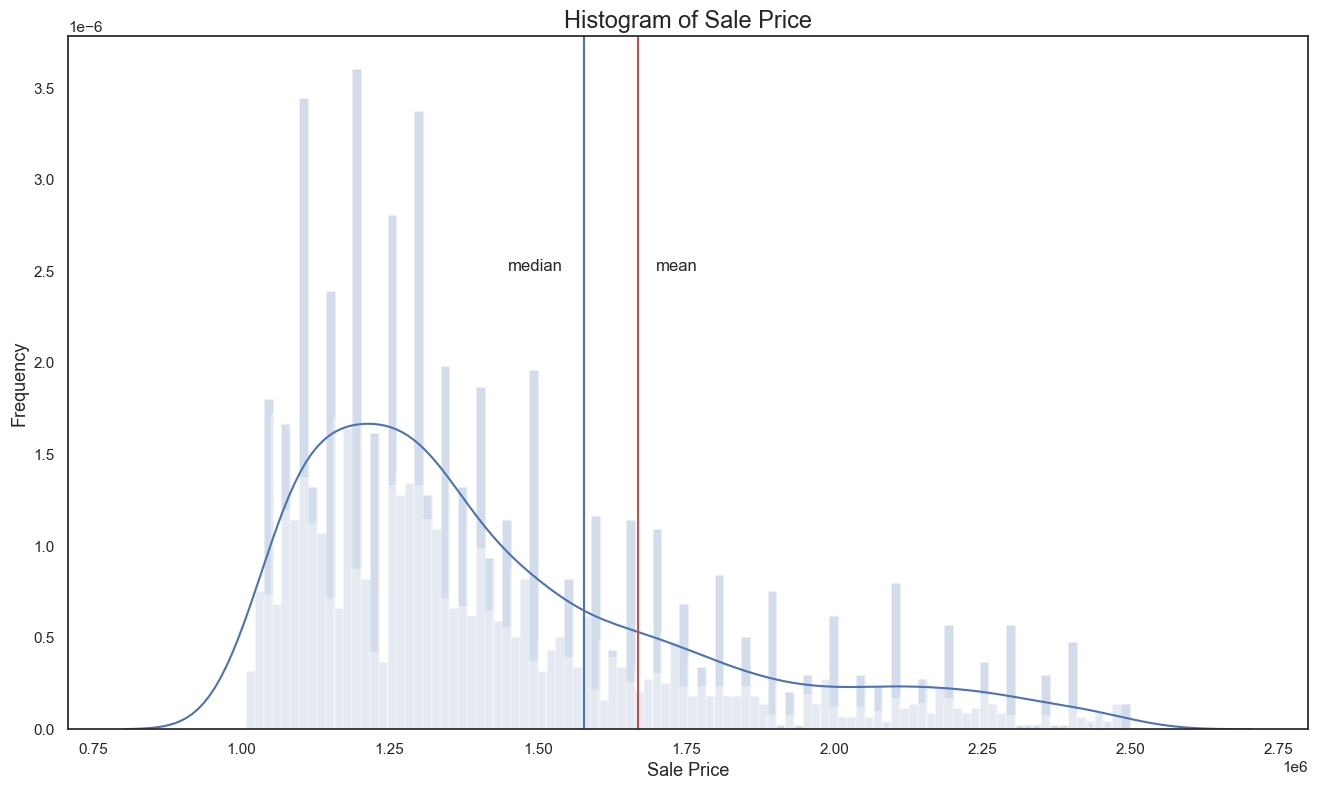

In [57]:
plt.figure(figsize=(16,9))
sns.distplot(df_nyc['SALE PRICE'],
                 bins=100,
                 kde=True,
                 hist_kws={'linewidth':15}
                )
# plt.xlim(900000, 5000000)
plt.xlabel('Sale Price', size=13) 
plt.ylabel('Frequency', size=13)
plt.axvline(df_nyc[(df_nyc['SALE PRICE'] >1300000) & (df_nyc['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='r')
plt.axvline(df_nyc[(df_nyc['SALE PRICE'] >1300000) & (df_nyc['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='b')
plt.title('Histogram of Sale Price', size=17)

plt.text(1450000, 0.0000025, 'median')
plt.text(1700000,0.0000025, "mean")

### Melihat distribusi dari atribut RESIDENTIAL UNITS

Text(1.7, 2, 'median')

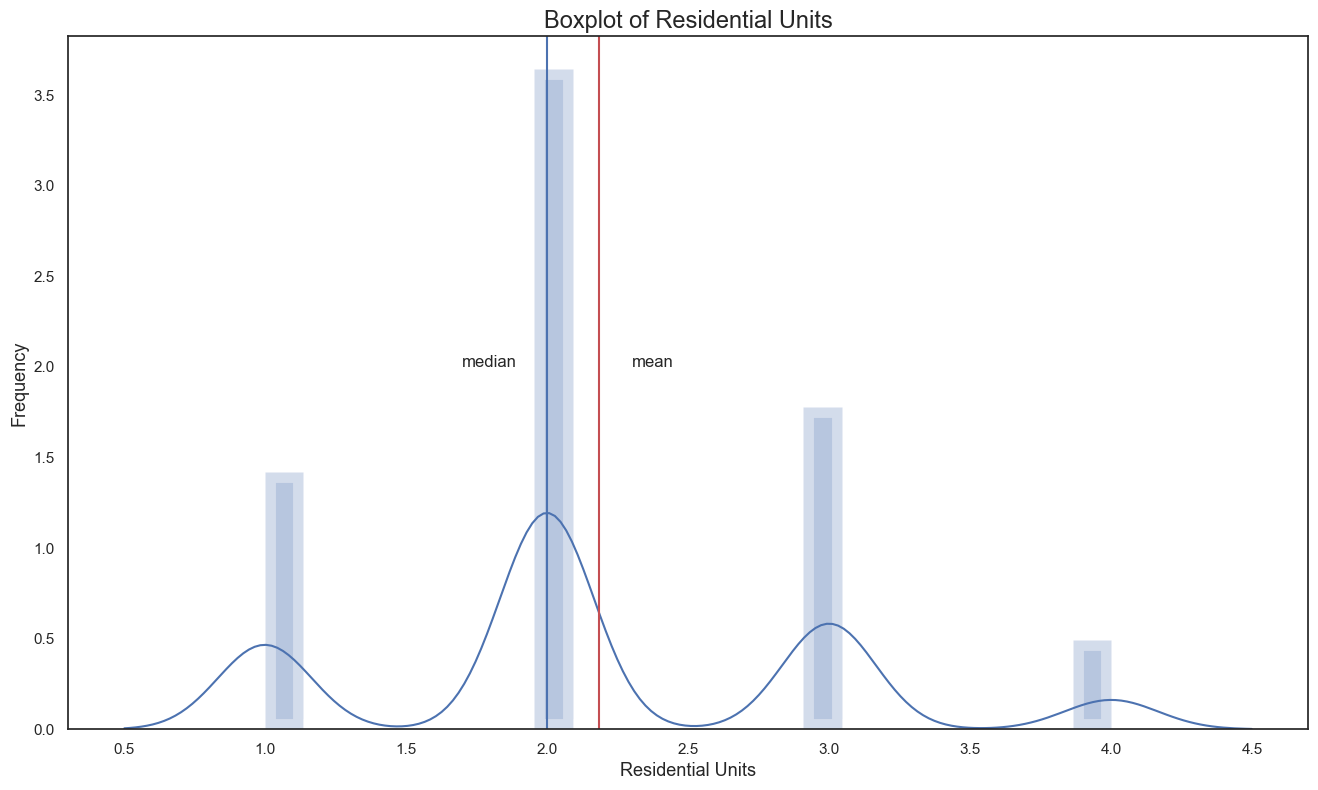

In [58]:
plt.figure(figsize=(16,9))
sns.distplot(df_nyc['RESIDENTIAL UNITS'],
                 # bins=100,
                 kde=True,
                 hist_kws={'linewidth':15}
                )
# plt.xlim(-5, 60)
plt.xlabel('Residential Units', size=13) 
plt.ylabel('Frequency', size=13)
plt.axvline(df_nyc[df_nyc['RESIDENTIAL UNITS'] < 30]['RESIDENTIAL UNITS'].mean(), c='r')
plt.axvline(df_nyc[df_nyc['RESIDENTIAL UNITS'] < 30]['RESIDENTIAL UNITS'].median(), c='b')
plt.title('Boxplot of Residential Units', size=17)

plt.text(2.3, 2, 'mean')
plt.text(1.7, 2, "median")

# exponential distribution dan positive skew

### Melihat distribusi dari atribut GROSS SQUARE FEET

Text(1800, 0.00029, 'median')

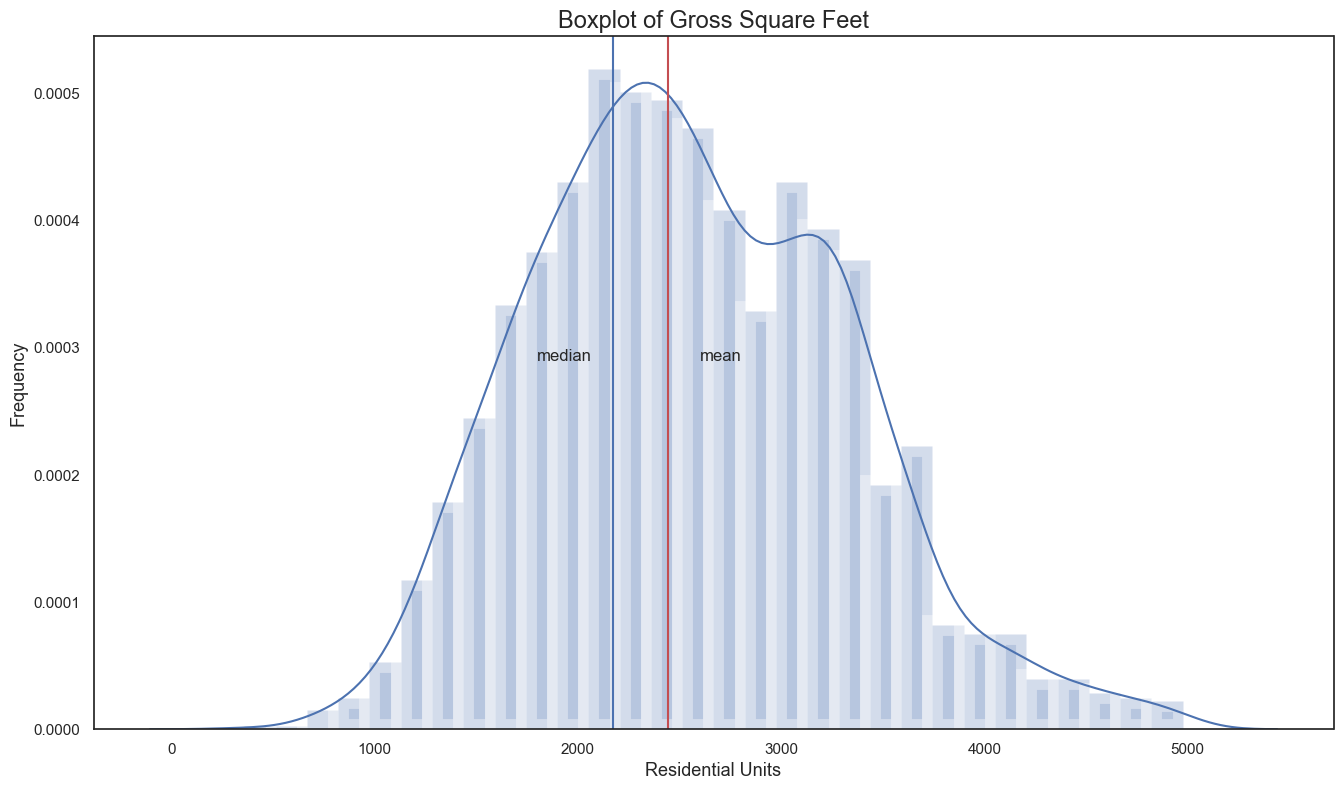

In [59]:
plt.figure(figsize=(16,9))
sns.distplot(df_nyc['GROSS SQUARE FEET'],
                 kde=True,
                 hist_kws={'linewidth':15}
                )
# plt.xlim(-5, 60)
plt.xlabel('Residential Units', size=13) 
plt.ylabel('Frequency', size=13)
plt.axvline(df_nyc[(df_nyc['GROSS SQUARE FEET']>1000) & (df_nyc['GROSS SQUARE FEET']<15000)]['LAND SQUARE FEET'].mean(), c='r')
plt.axvline(df_nyc[(df_nyc['GROSS SQUARE FEET']>1000) & (df_nyc['GROSS SQUARE FEET']<15000)]['LAND SQUARE FEET'].median(), c='b')
plt.title('Boxplot of Gross Square Feet', size=17)

plt.text(2600, 0.00029, 'mean')
plt.text(1800, 0.00029, "median")

# exponential distribution dan positive skew

### Melihat distribusi dari atribut LAND SQUARE FEET

Text(1800, 0.0012, 'median')

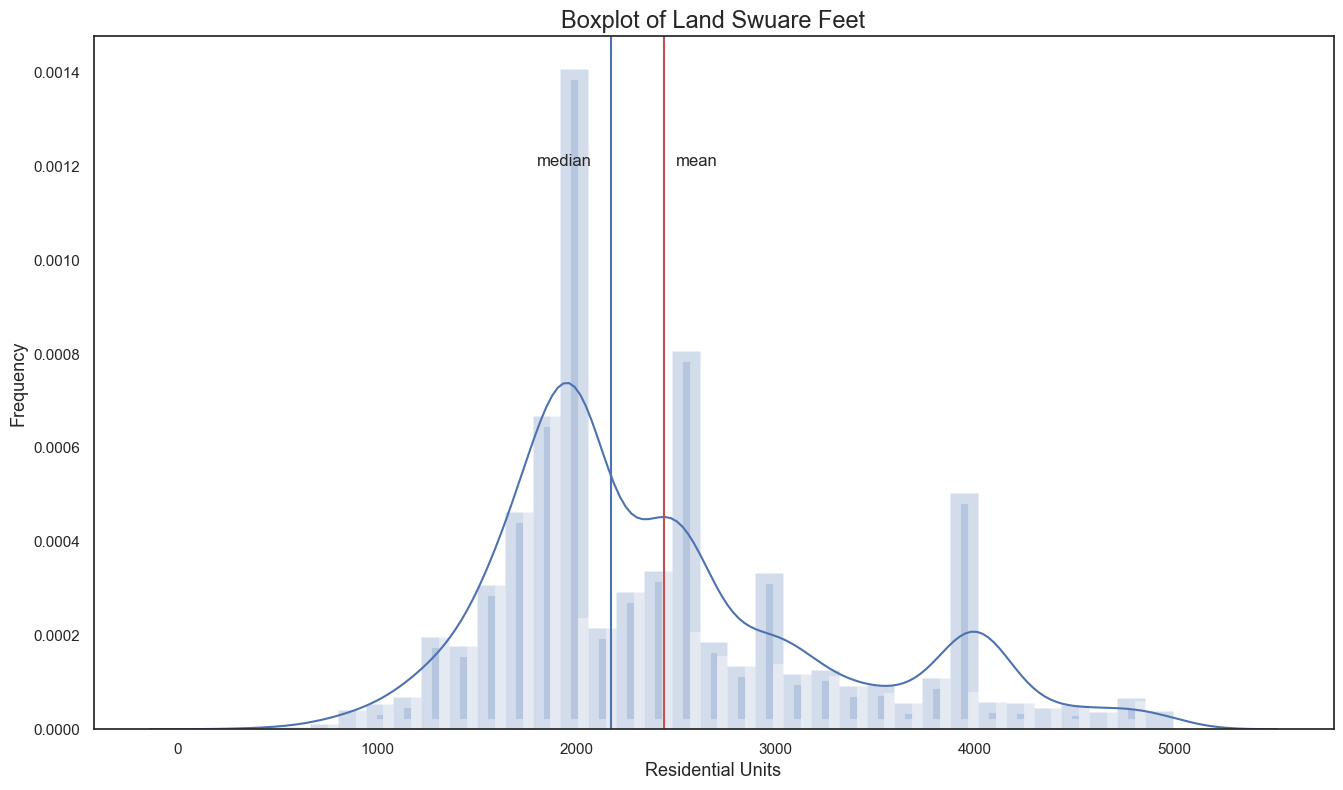

In [60]:
plt.figure(figsize=(16,9))
sns.distplot(df_nyc['LAND SQUARE FEET'],
                 kde=True,
                 hist_kws={'linewidth':15}
                )
# plt.xlim(-5, 60)
plt.xlabel('Residential Units', size=13) 
plt.ylabel('Frequency', size=13)
plt.axvline(df_nyc[(df_nyc['LAND SQUARE FEET']<10000)]['LAND SQUARE FEET'].mean(), c='r')
plt.axvline(df_nyc[(df_nyc['LAND SQUARE FEET']<10000)]['LAND SQUARE FEET'].median(), c='b')
plt.title('Boxplot of Land Swuare Feet', size=17)

plt.text(2500, 0.0012, 'mean')
plt.text(1800, 0.0012, "median")

# exponential distribution dan positive skew

## MEASURE OF SPREAD

### Sale Price

In [61]:
range_price = df_nyc['SALE PRICE'].max() - df_nyc['SALE PRICE'].min()
print(f"Range of Sale Price    : {range_price}")
var_price = statistics.variance(df_nyc['SALE PRICE'])
print(f"Variance of Sale Price : {var_price}")
std_price = statistics.stdev(df_nyc['SALE PRICE'])
print(f"Standard Deviation     : {std_price}")

Range of Sale Price    : 1491000.0
Variance of Sale Price : 114485277023.6564
Standard Deviation     : 338356.73042464576


### Residential Units

In [62]:
range_units= df_nyc['RESIDENTIAL UNITS'].max() - df_nyc['RESIDENTIAL UNITS'].min()
print(f"Range of Residential Units    : {range_price}")
var_units = statistics.variance(df_nyc['RESIDENTIAL UNITS'])
print(f"Variance of Residential Units : {var_price}")
std_units = statistics.stdev(df_nyc['RESIDENTIAL UNITS'])
print(f"Standard Deviation            : {std_price}")

Range of Residential Units    : 1491000.0
Variance of Residential Units : 114485277023.6564
Standard Deviation            : 338356.73042464576


### Gross Square Feet

In [63]:
range_gross= df_nyc['GROSS SQUARE FEET'].max() - df_nyc['GROSS SQUARE FEET'].min()
print(f"Range of Residential Units    : {range_gross}")
var_gross = statistics.variance(df_nyc['GROSS SQUARE FEET'])
print(f"Variance of Residential Units : {var_gross}")
std_gross = statistics.stdev(df_nyc['GROSS SQUARE FEET'])
print(f"Standard Deviation            : {std_gross}")

Range of Residential Units    : 4616.0
Variance of Residential Units : 585326.4980085345
Standard Deviation            : 765.0663356915755


### Land Square Feet

In [64]:
range_land= df_nyc['LAND SQUARE FEET'].max() - df_nyc['LAND SQUARE FEET'].min()
print(f"Range of Residential Units    : {range_land}")
var_land = statistics.variance(df_nyc['LAND SQUARE FEET'])
print(f"Variance of Residential Units : {var_land}")
std_land = statistics.stdev(df_nyc['LAND SQUARE FEET'])
print(f"Standard Deviation            : {std_land}")

Range of Residential Units    : 4608.0
Variance of Residential Units : 743180.4816676764
Standard Deviation            : 862.0791620655706


# Heat Maps

<AxesSubplot:>

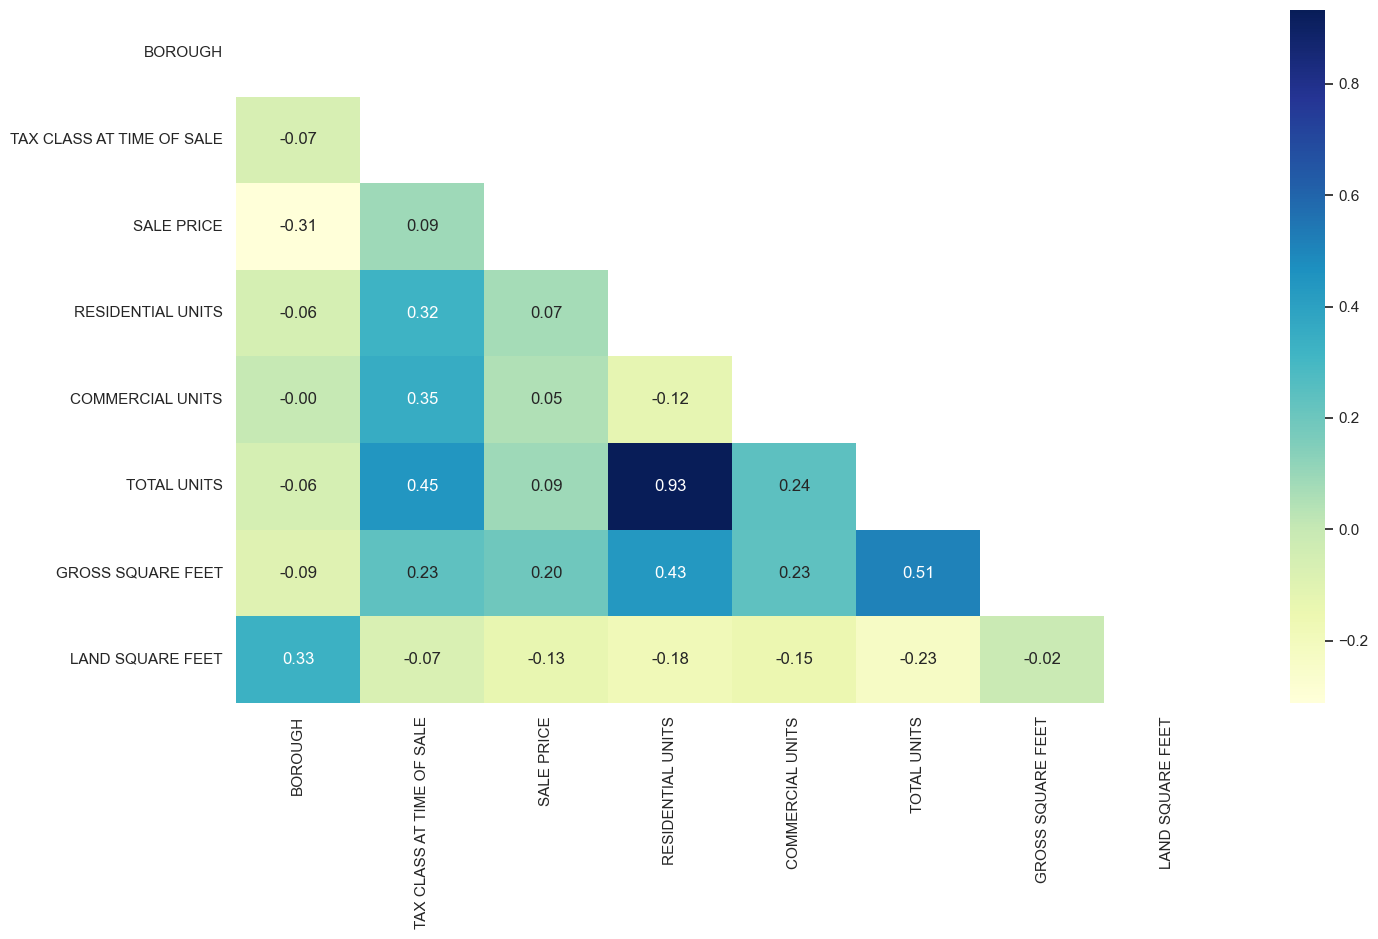

In [65]:
plt.subplots(figsize=(16, 9))
sns.set(style='white')
mask = np.triu(np.ones_like(df_nyc.corr()))
sns.heatmap(df_nyc.corr(method='pearson'), cmap='YlGnBu', annot=True, fmt='.2f', mask=mask)

### Mengelompokkan value berdasarkan BOROUGH

In [66]:
df_nyc.groupby(by='BOROUGH').count()

,TAX CLASS AT TIME OF SALE,SALE PRICE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET
BOROUGH,,,,,,,
1,73,73,73,73,73,73,73
2,6,6,6,6,6,6,6
3,1970,1970,1970,1970,1970,1970,1970
4,887,887,887,887,887,887,887
5,6,6,6,6,6,6,6


Dari fungsi di atas dapat diambil kesimpulan bahwa terdapat 5 atribut borough pada dataset 

### Mengubah value pada kolom BOROUGH menjadi str dan melakukan replace

In [67]:
df_nyc['BOROUGH'] = df_nyc['BOROUGH'].astype(str)
df_nyc['BOROUGH'] = df_nyc['BOROUGH'].str.replace("1", "Manhattan")
df_nyc['BOROUGH'] = df_nyc['BOROUGH'].str.replace("2", "Bronx")
df_nyc['BOROUGH'] = df_nyc['BOROUGH'].str.replace("3", "Brooklyn")
df_nyc['BOROUGH'] = df_nyc['BOROUGH'].str.replace("4", "Queens")
df_nyc['BOROUGH'] = df_nyc['BOROUGH'].str.replace("5", "Staten Island")

In [68]:
df_nyc

,BOROUGH,TAX CLASS AT TIME OF SALE,SALE PRICE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET
170,Manhattan,1,1375000.0,1,0,1,1152.0,384.0
209,Manhattan,1,2300000.0,1,0,1,3036.0,1549.0
210,Manhattan,1,1510000.0,1,0,1,3200.0,1665.0
212,Manhattan,1,1595790.0,1,0,1,3536.0,1699.0
213,Manhattan,1,2200000.0,1,0,1,3951.0,1488.0
...,...,...,...,...,...,...,...,...
44686,Staten Island,1,1300000.0,1,0,1,1675.0,2420.0
45495,Staten Island,1,1900000.0,2,0,2,1640.0,2500.0
46856,Staten Island,1,1090000.0,2,0,2,4230.0,3560.0
47093,Staten Island,1,1070000.0,2,1,3,2700.0,3300.0


# CONFIDENCE INTERVAL

### CONFIDENCE INTERVAL FOR THE POPULATION PROPORTION

In [69]:
df_nyc.groupby(by=['BOROUGH', 'TAX CLASS AT TIME OF SALE'])[['TOTAL UNITS']].count()

TOTAL UNITS
BOROUGH       TAX CLASS AT TIME OF SALE             
Bronx         1                                    5
              2                                    1
Brooklyn      1                                 1829
              2                                  126
              4                                   15
Manhattan     1                                   44
              2                                   26
              4                                    3
Queens        1                                  808
              2                                   68
              4                                   11
Staten Island 1                                    4
              2                                    2

Menggunakan data berdasarkan BOROUGH Manhattan dengan TAX CLASS AT TIME SALE adalah 4

In [70]:
n = 4 + 23 + 7
pro_4 = 7/n
print(n, pro_4)

34 0.20588235294117646


- Jumlah units dengan kelas pajak 4 saat penjualan pada Wilayah Manhattan adalah 7 unit
- Jumlah populasi unit di Manhattan adalah 34 unit

In [71]:
stderror_man = (pro_4*(1-pro_4)/n)**(1/2)
stderror_man

0.06934458070529785

Standar error adalah 0.069

Confidence Interval 95% maka z-score 1.96

In [72]:
z_score = 1.96
low_ci_man = pro_4 - (z_score*stderror_man)
up_ci_man = pro_4 - (z_score*stderror_man)
print (f'Confidence interval untuk lower ci adalah {low_ci_man}\nconfidence interval untuk upper ci adalah {up_ci_man}')

Confidence interval untuk lower ci adalah 0.06996697475879268
confidence interval untuk upper ci adalah 0.06996697475879268


In [73]:
 print('Margin Error=',(z_score*stderror_man))

Margin Error= 0.13591537818238378


### CONFIDENCE INTERVAL FOR THE POPULATION PROPORTION

In [74]:
df_nyc

,BOROUGH,TAX CLASS AT TIME OF SALE,SALE PRICE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET
170,Manhattan,1,1375000.0,1,0,1,1152.0,384.0
209,Manhattan,1,2300000.0,1,0,1,3036.0,1549.0
210,Manhattan,1,1510000.0,1,0,1,3200.0,1665.0
212,Manhattan,1,1595790.0,1,0,1,3536.0,1699.0
213,Manhattan,1,2200000.0,1,0,1,3951.0,1488.0
...,...,...,...,...,...,...,...,...
44686,Staten Island,1,1300000.0,1,0,1,1675.0,2420.0
45495,Staten Island,1,1900000.0,2,0,2,1640.0,2500.0
46856,Staten Island,1,1090000.0,2,0,2,4230.0,3560.0
47093,Staten Island,1,1070000.0,2,1,3,2700.0,3300.0


Melakukan generate data untuk LAND SQUARE FEET dan GROSS SQUARE FEET

In [75]:
# all_land = df_nyc['GROSS SQUARE FEET']
df_land = pd.DataFrame(df_nyc['GROSS SQUARE FEET'])
df_land

,GROSS SQUARE FEET
170,1152.0
209,3036.0
210,3200.0
212,3536.0
213,3951.0
...,...
44686,1675.0
45495,1640.0
46856,4230.0
47093,2700.0


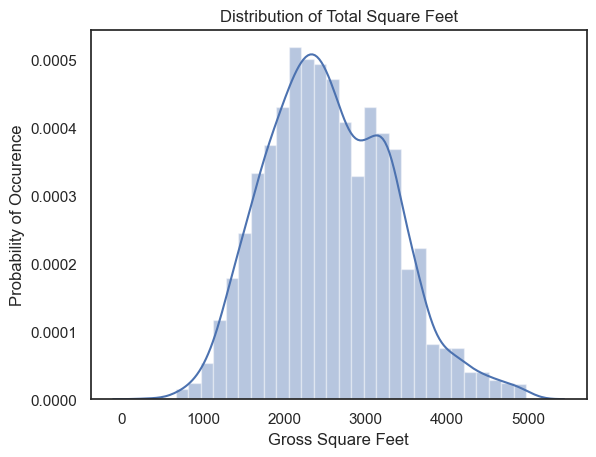

In [76]:
sns.distplot(df_land['GROSS SQUARE FEET'])
plt.ylabel('Probability of Occurence')
plt.xlabel('Gross Square Feet')
plt.title('Distribution of Total Square Feet')
plt.show()

In [77]:
population_mean = df_land['GROSS SQUARE FEET'].mean()
population_mean

2557.1910265125766

In [78]:
population_std = df_land['GROSS SQUARE FEET'].std(ddof=1)
population_std

765.0663356915755

Mengambil 150000 sampel dengan masing-masing 50 dari nilai acak. Untuk setiap sampel akan dihitung nilai rata-rata sampelnya kemudian disimpan dalam list sample_means

In [79]:
n = 50
sample_means = []
for sampel in range(0,150000):
    sample_values= df_land['GROSS SQUARE FEET'].sample(n)
    sample_mean = sample_values.mean()
    sample_means.append(sample_mean)

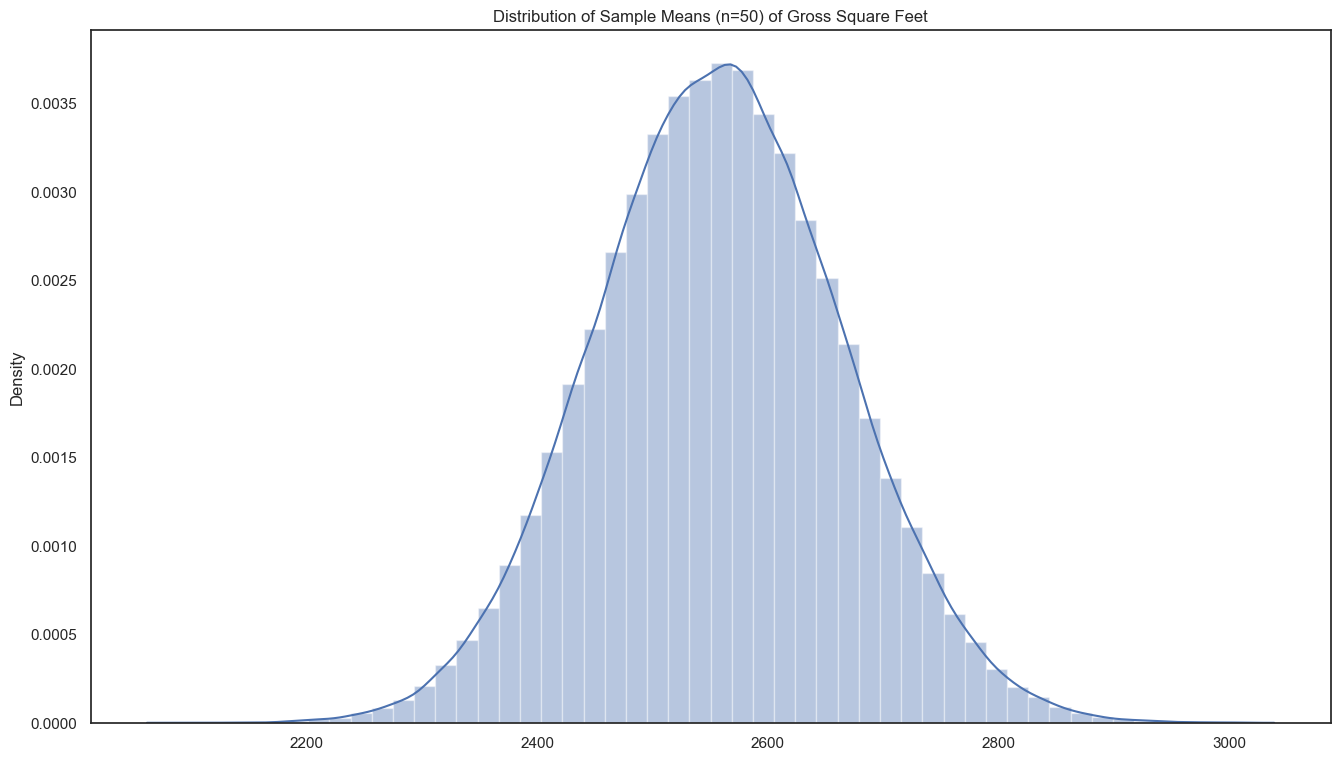

In [80]:
plt.figure(figsize=(16,9))
sns.distplot(sample_means)
plt.title('Distribution of Sample Means (n=50) of Gross Square Feet')
plt.show()

In [81]:
df_land['GROSS SQUARE FEET'].sample(10)

10204    3360.0
12745    3187.0
22518    1878.0
457      3480.0
10847    3430.0
37363    1584.0
25182    2310.0
22629    3654.0
22689    2280.0
35330    1224.0
Name: GROSS SQUARE FEET, dtype: float64

In [82]:
mean_of_sample_means = np.mean(sample_means)
median_of_sample_means = np.median(sample_means)
print('mean : ',mean_of_sample_means, '\nmedian :',median_of_sample_means)

mean :  2557.386817733333 
median : 2556.96


In [83]:
population_mean

2557.1910265125766

In [84]:
std_of_sample_means = np.std(sample_means)
std_of_sample_means

107.3473349378169

In [85]:
standard_error = population_std/np.sqrt(n)
standard_error

108.19671880501132

In [86]:
lower_bound = mean_of_sample_means - z_score * standard_error
upper_bound = mean_of_sample_means + z_score * standard_error
print(lower_bound , upper_bound )

2345.3212488755107 2769.452386591155


Text(2700, 0.0025, 'Shaded area are \npart of the \nconfidence intervals \n95%')

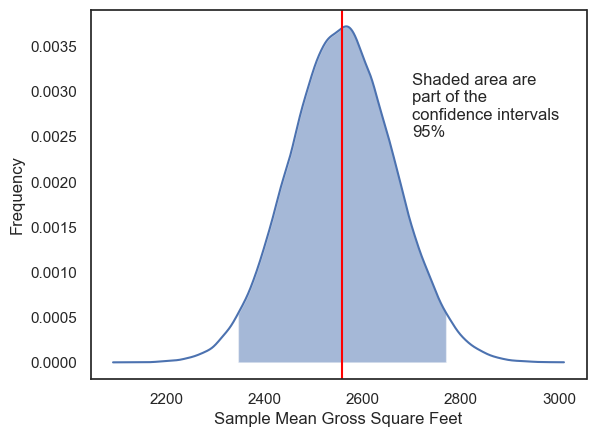

In [87]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means),np.max(sample_means),10000)
plt.plot(pos,kde(pos))
shade = np.linspace(lower_bound,upper_bound,300)
plt.fill_between(shade,kde(shade),alpha=0.5)
plt.xlabel('Sample Mean Gross Square Feet')
plt.ylabel('Frequency')
plt.axvline(x=mean_of_sample_means,color='red')
plt.text(x=2700,y=0.0025,s='Shaded area are \npart of the \nconfidence intervals \n95%')

# HYPOTHESIS TESTING

In [88]:
df_nyc 

,BOROUGH,TAX CLASS AT TIME OF SALE,SALE PRICE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET
170,Manhattan,1,1375000.0,1,0,1,1152.0,384.0
209,Manhattan,1,2300000.0,1,0,1,3036.0,1549.0
210,Manhattan,1,1510000.0,1,0,1,3200.0,1665.0
212,Manhattan,1,1595790.0,1,0,1,3536.0,1699.0
213,Manhattan,1,2200000.0,1,0,1,3951.0,1488.0
...,...,...,...,...,...,...,...,...
44686,Staten Island,1,1300000.0,1,0,1,1675.0,2420.0
45495,Staten Island,1,1900000.0,2,0,2,1640.0,2500.0
46856,Staten Island,1,1090000.0,2,0,2,4230.0,3560.0
47093,Staten Island,1,1070000.0,2,1,3,2700.0,3300.0


In [89]:
df_nyc['BOROUGH'].value_counts()

Brooklyn         1970
Queens            887
Manhattan          73
Bronx               6
Staten Island       6
Name: BOROUGH, dtype: int64

Uji apakah rata-rata harga units di Brooklyn lebih mahal daripada rata-rata harga units di Manhattan

- h0 = rata-rata harga units di Brooklyn tidak lebih mahal signifikan daripada rata-rata harga units di Manhattan
- h1 = rata-rata harga units di Brooklyn lebih mahal signifikan daripada rata-rata harga units di Manhattan


- h0 = meanBrooklyn <= meanManhattan
- h1 = meanBrooklyn > meanManhattan

In [90]:
brooklyn = df_nyc[df_nyc['BOROUGH'] == 'Brooklyn']
manhattan = df_nyc[df_nyc['BOROUGH'] == 'Manhattan']

In [91]:
# brooklyn
n_brooklyn = len(brooklyn)
mean_brooklyn = brooklyn['SALE PRICE'].mean()
std_brooklyn = brooklyn['SALE PRICE'].std()
print(n_brooklyn, mean_brooklyn, std_brooklyn)

1970 1475031.895431472 350157.9993883246


In [92]:
# manhattan
n_manhattan = len(manhattan)
mean_manhattan = manhattan['SALE PRICE'].mean()
std_manhattan = manhattan['SALE PRICE'].std()
print(n_manhattan, mean_manhattan, std_manhattan)

73 1882650.904109589 399700.2999768551


In [93]:
import statsmodels.api as sm

In [94]:
# Confidence level = 95%
alpha = 0.05

price_hypo = sm.stats.ztest(brooklyn['SALE PRICE'].dropna(),manhattan['SALE PRICE'].dropna(),alternative='larger')
price_hypo

(-9.71498364742797, 1.0)

In [95]:
if price_hypo[1]>alpha:
    print('Accept Null Hypothesis (h0) Mean of Brooklyn Unit Price is not Larger than Manhattan')
else:
    print('Reject Null Hypothesis (h0)  Mean of Brooklyn Unit Price is Larger than Manhattan')

Accept Null Hypothesis (h0) Mean of Brooklyn Unit Price is not Larger than Manhattan


# CONCLUSION

1. Confidence interval dengan z-score 95% menyatakan bahwa rata-rata luas lantau bangunan secara keseluruhan atau atribut GROSS SQUARE FEET di Newyork berada pada rentang 2400 hingga 2800
2. Rata-rata harga units yang terjual di Brooklyn sama rata-rata harga units yang terjual di Manhttan sehingga dapat disimpulkan bahwa tidak terdapat perbedaan yang signifikan harga unit di Brooklyn dibandingkan dengan Manhattan. H(0) diterima dengan alpha 0.05 dan z-score 95% (1,96).